- [ ] <a name='20'>[${\underline{\color{}{\bf{\text{Data Preparation}}}}}$](#30)</a>

- - <a name=''>${\small{\color{}{\bf{\text{Import Necessary Libraries}}}}}$</a>

In [38]:
import torch
import numpy as np
from termcolor import colored
import matplotlib.pyplot as plt
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
cuda_result = torch.cuda.is_available()
print(f'\nResult of the Cuda Availability: {cuda_result}\n')


Result of the Cuda Availability: True



- - <a name=''>[${\bf{\underline{\small{\color{}{{\text{MNIST Dataset}}}}}}}$](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST)</a>

- - - <a name=''>[${{\small{\color{}{\bf{\underline{\text{Data Transformations and Augmentations}}:}}\color{red}{\bf{\text{ Not used}}}{}}}}$](https://pytorch.org/vision/main/transforms.html)</a>



In [ ]:
T = transforms.Compose([transforms.ToTensor()])
T

Compose(
    ToTensor()
)

In [ ]:
path_root_str = '/content/drive/MyDrive/Colab/Ex_1'

dataset_MNIST = datasets.MNIST(root=path_root_str, train=True, download=True, transform=T)
dataset_MNIST_test = datasets.MNIST(root=path_root_str, train=False, download=True, transform=T)

print(f'\nMNIST Dataset Train: \n\n{dataset_MNIST}\n')
print(f'\nMNIST Dataset Test: \n\n{dataset_MNIST_test}\n')


MNIST Dataset Train: 

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab/Ex_1
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


MNIST Dataset Test: 

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab/Ex_1
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )



- - <a name=''>${\small{\color{}{\bf{\text{Data Exploring}}}}}$</a>



In [ ]:
print(f'\nType of data_MNIST Data: {type(dataset_MNIST.data)}\n')
print(f'\nShape of data_MNIST Data: {dataset_MNIST.data.shape}\n')
print(f'\nData Type of data_MNIST Data: {dataset_MNIST.data.dtype}\n\n\n')

print(f'\n\n\nType of data_MNIST Data: {type(dataset_MNIST.targets)}\n')
print(f'\n\nShape of data_MNIST Targets: {dataset_MNIST.targets.shape}\n')
print(f'\nData Type of data_MNIST Targets: {dataset_MNIST.targets.dtype}\n')


Type of data_MNIST Data: <class 'torch.Tensor'>


Shape of data_MNIST Data: torch.Size([60000, 28, 28])


Data Type of data_MNIST Data: torch.uint8






Type of data_MNIST Data: <class 'torch.Tensor'>



Shape of data_MNIST Targets: torch.Size([60000])


Data Type of data_MNIST Targets: torch.int64



- - <a name=''>${\small{\color{}{\bf{\text{Data Showing}}}}}$</a>



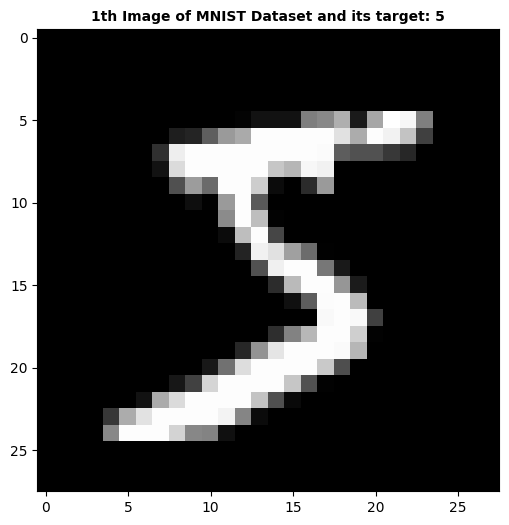

In [ ]:
idx_img = 0
img_gray = dataset_MNIST.data[idx_img]
target = dataset_MNIST.targets[idx_img]

plt.figure(1, figsize=(6, 6))
plt.imshow(img_gray, cmap='gray'), plt.title(f'{idx_img + 1}th Image of MNIST Dataset and its target: {target}', fontweight='bold', color='black', fontsize=10)
plt.show()

- - <a name=''>[${\bf{\underline{\small{\color{}{{\text{Data Splitting}}}}}}}$](https://pytorch.org/docs/stable/data.html)</a>

In [ ]:
torch.manual_seed(0)
dataset_MNIST_train, dataset_MNIST_val = random_split(dataset_MNIST, [50000, 10000])

print(f'\nNo. Samples for dataset_MNIST_train: {len(dataset_MNIST_train)}\n')
print(f'\nNo. Samples for dataset_MNIST_val: {len(dataset_MNIST_val)}\n')
print(f'\nNo. Samples for dataset_MNIST_test: {len(dataset_MNIST_test)}\n')


No. Samples for dataset_MNIST_train: 50000


No. Samples for dataset_MNIST_val: 10000


No. Samples for dataset_MNIST_test: 10000



- - <a name=''>[${\bf{\underline{\small{\color{}{{\text{Data Loader}}}}}}}$](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)</a>

In [ ]:
torch.manual_seed(0)
batch_size = 64
train_loader = DataLoader(dataset_MNIST_train, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset_MNIST_val, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset_MNIST_test, batch_size=batch_size, shuffle=False)

- - <a name=''>${\small{\color{}{\bf{\text{Data Showing: First Batch of the Train Loader}}}}}$</a>


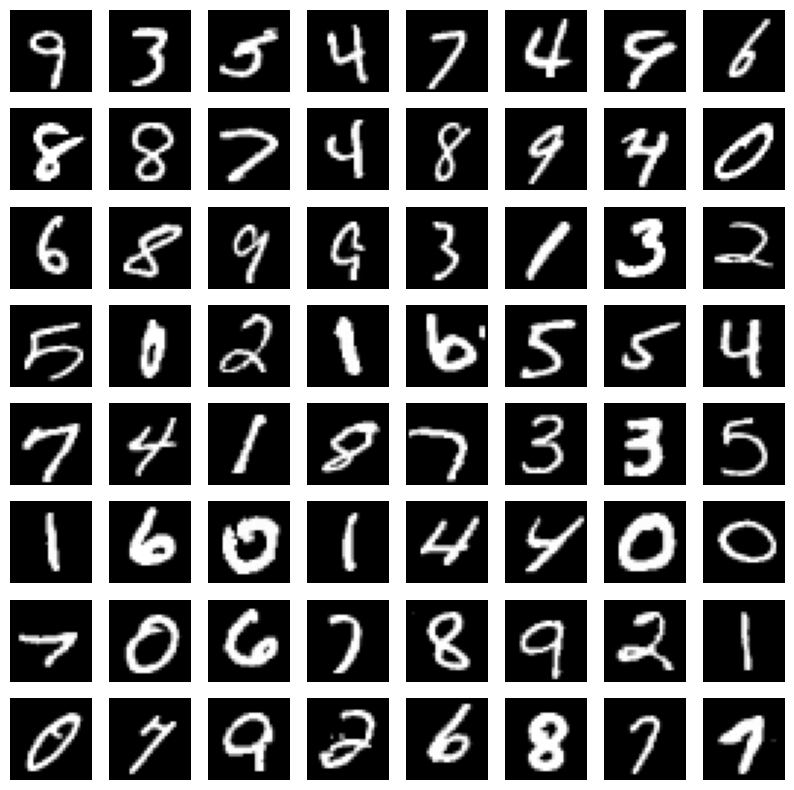

In [ ]:

num_batches = 0
for x, y in train_loader:
    
    
    for i in range(batch_size):
        img = x[i].squeeze(0)
        plt.figure(1, figsize=(10, 10))
        plt.subplot(8, 8, i + 1), plt.imshow(img, cmap='gray'), plt.axis('off')

    num_batches += 1
    if num_batches == 1: 
        break

plt.show()

- [x] <a name=''>${{\color{}{\bf{\text{Data Preparation}}}}}$</a>

- [ ] <a name=''>${{\color{}{\bf{\text{Neural Network Definition}}}}}$</a>

- - <a name=''>${{\small{\color{}{\bf{\text{CNN with Xavier_Uniform Initialization Method}}}}}}$</a>

In [ ]:
import torch.nn as nn

In [ ]:
p_drop = 0.2
num_outputs = 10
class CNN_Net(nn.Module):

    def __init__(self):

        super(CNN_Net, self).__init__()

        # 1th Layer:
        self.CNN1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=2, padding=1, dilation=1)
        self.BatchNorm1 = nn.BatchNorm2d(num_features=32)
        self.ReLU1 = nn.ReLU()
        self.Dropout1 = nn.Dropout2d(p=p_drop)

        # 2th Layer:
        self.CNN2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, dilation=1)
        self.BatchNorm2 = nn.BatchNorm2d(num_features=32)
        self.ReLU2 = nn.ReLU()
        self.Dropout2 = nn.Dropout2d(p=p_drop)

        # 3th Layer:
        self.CNN3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1, stride=1, padding=1, dilation=1)
        self.BatchNorm3 = nn.BatchNorm2d(num_features=64)
        self.ReLU3 = nn.ReLU()
        self.Dropout3 = nn.Dropout2d(p=p_drop)

        # 4th Layer:
        self.CNN4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=2, padding=1, dilation=1)
        self.BatchNorm4 = nn.BatchNorm2d(num_features=64)
        self.ReLU4 = nn.ReLU()
        self.Dropout4 = nn.Dropout2d(p=p_drop)

        # 5th Layer:
        self.CNN5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=1, stride=1, padding=1, dilation=1)
        self.BatchNorm5 = nn.BatchNorm2d(num_features=128)
        self.ReLU5 = nn.ReLU()
        self.Dropout5 = nn.Dropout2d(p=p_drop)

        # 6th Layer:
        self.CNN6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1, dilation=1)
        self.BatchNorm6 = nn.BatchNorm2d(num_features=128)
        self.ReLU6 = nn.ReLU()
        self.Dropout6 = nn.Dropout2d(p=p_drop)

        # 7th Layer:
        self.CNN7 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=1, stride=1, padding=1, dilation=1)
        self.BatchNorm7 = nn.BatchNorm2d(num_features=128)
        self.ReLU7 = nn.ReLU()
        self.Dropout7 = nn.Dropout2d(p=p_drop)

        # 8th Layer:
        self.CNN8 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1, dilation=1)
        self.BatchNorm8 = nn.BatchNorm2d(num_features=128)
        self.ReLU8 = nn.ReLU()
        self.Dropout8 = nn.Dropout2d(p=p_drop)

        # 9th Layer:
        self.CNN9 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1, stride=1, padding=1, dilation=1)
        self.BatchNorm9 = nn.BatchNorm2d(num_features=256)
        self.ReLU9 = nn.ReLU()
        self.Dropout9 = nn.Dropout2d(p=p_drop)

        # 10th Layer:
        self.CNN10 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1, dilation=1)
        self.BatchNorm10 = nn.BatchNorm2d(num_features=256)
        self.ReLU10 = nn.ReLU()
        self.Dropout10 = nn.Dropout2d(p=p_drop)

        # 11th Layer:
        self.CNN11 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=1, stride=1, padding=1, dilation=1)
        self.BatchNorm11 = nn.BatchNorm2d(num_features=256)
        self.ReLU11 = nn.ReLU()
        self.Dropout11 = nn.Dropout2d(p=p_drop)

        # 12th Layer:
        self.CNN12 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1, dilation=1)
        self.BatchNorm12 = nn.BatchNorm2d(num_features=256)
        self.ReLU12 = nn.ReLU()
        self.Dropout12 = nn.Dropout2d(p=p_drop)

        # 13th Layer:
        self.CNN13 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=1, stride=1, padding=1, dilation=1)
        self.BatchNorm13 = nn.BatchNorm2d(num_features=512)
        self.ReLU13 = nn.ReLU()
        self.Dropout13 = nn.Dropout2d(p=p_drop)

        # 14th Layer:
        self.CNN14 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1, dilation=1)
        self.BatchNorm14 = nn.BatchNorm2d(num_features=512)
        self.ReLU14 = nn.ReLU()
        self.Dropout14 = nn.Dropout2d(p=p_drop)

        # 15th Layer:
        self.CNN15 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1, stride=1, padding=1, dilation=1)
        self.BatchNorm15 = nn.BatchNorm2d(num_features=512)
        self.ReLU15 = nn.ReLU()
        self.Dropout15 = nn.Dropout2d(p=p_drop)

        # 16th Layer:
        self.CNN16 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=2, padding=1, dilation=1)
        self.BatchNorm16 = nn.BatchNorm2d(num_features=512)
        self.ReLU16 = nn.ReLU()
        self.Dropout16 = nn.Dropout2d(p=p_drop)

        # 17th Layer:
        self.CNN17 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=1, stride=1, padding=1, dilation=1)
        self.BatchNorm17 = nn.BatchNorm2d(num_features=1024)
        self.ReLU17 = nn.ReLU()
        self.Dropout17 = nn.Dropout2d(p=p_drop)

        # 18th Layer:
        self.CNN18 = nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, stride=1, padding=1, dilation=1)
        self.BatchNorm18 = nn.BatchNorm2d(num_features=1024)
        self.ReLU18 = nn.ReLU()
        self.Dropout18 = nn.Dropout2d(p=p_drop)

        # 19th Layer:
        self.CNN19 = nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=1, stride=1, padding=1, dilation=1)
        self.BatchNorm19 = nn.BatchNorm2d(num_features=1024)
        self.ReLU19 = nn.ReLU()
        self.Dropout19 = nn.Dropout2d(p=p_drop)

        # # 20th Layer:
        self.AAP20 = nn.AdaptiveAvgPool2d(output_size=(11, 11))

        # 21th Layer:
        self.FC21 = nn.Linear(in_features=1024 * 11 * 11, out_features=num_outputs)





        # Apply Xavier Uniform initialization to the weights of the convolutional layers and linear layer
        nn.init.xavier_uniform_(self.CNN1.weight)
        nn.init.xavier_uniform_(self.CNN2.weight)
        nn.init.xavier_uniform_(self.CNN3.weight)
        nn.init.xavier_uniform_(self.CNN4.weight)
        nn.init.xavier_uniform_(self.CNN5.weight)
        nn.init.xavier_uniform_(self.CNN6.weight)
        nn.init.xavier_uniform_(self.CNN7.weight)
        nn.init.xavier_uniform_(self.CNN8.weight)
        nn.init.xavier_uniform_(self.CNN9.weight)
        nn.init.xavier_uniform_(self.CNN10.weight)
        nn.init.xavier_uniform_(self.CNN11.weight)
        nn.init.xavier_uniform_(self.CNN12.weight)
        nn.init.xavier_uniform_(self.CNN13.weight)
        nn.init.xavier_uniform_(self.CNN14.weight)
        nn.init.xavier_uniform_(self.CNN15.weight)
        nn.init.xavier_uniform_(self.CNN16.weight)
        nn.init.xavier_uniform_(self.CNN17.weight)
        nn.init.xavier_uniform_(self.CNN18.weight)
        nn.init.xavier_uniform_(self.CNN19.weight)
        nn.init.xavier_uniform_(self.FC21.weight)

        
        
        # Apply Normal initialization to the biases of the convolutional layers and linear layer
        nn.init.normal_(self.CNN1.bias)
        nn.init.normal_(self.CNN2.bias)
        nn.init.normal_(self.CNN3.bias)
        nn.init.normal_(self.CNN4.bias)
        nn.init.normal_(self.CNN5.bias)
        nn.init.normal_(self.CNN6.bias)
        nn.init.normal_(self.CNN7.bias)
        nn.init.normal_(self.CNN8.bias)
        nn.init.normal_(self.CNN9.bias)
        nn.init.normal_(self.CNN10.bias)
        nn.init.normal_(self.CNN11.bias)
        nn.init.normal_(self.CNN12.bias)
        nn.init.normal_(self.CNN13.bias)
        nn.init.normal_(self.CNN14.bias)
        nn.init.normal_(self.CNN15.bias)
        nn.init.normal_(self.CNN16.bias)
        nn.init.normal_(self.CNN17.bias)
        nn.init.normal_(self.CNN18.bias)
        nn.init.normal_(self.CNN19.bias)
        nn.init.normal_(self.FC21.bias)
        





    def forward(self, x: torch.Tensor) -> torch.Tensor:

        x = x.float()  # x type must be 'torch.float32'

        # 1th Layer:
        x = self.CNN1(x)
        x = self.BatchNorm1(x)
        x = self.ReLU1(x)
        x = self.Dropout1(x)
        
        # 2th Layer:
        x = self.CNN2(x)
        x = self.BatchNorm2(x)
        x = self.ReLU2(x)
        x = self.Dropout2(x)

        # 3th Layer:
        x = self.CNN3(x)
        x = self.BatchNorm3(x)
        x = self.ReLU3(x)
        x = self.Dropout3(x)

        # 4th Layer:
        x = self.CNN4(x)
        x = self.BatchNorm4(x)
        x = self.ReLU4(x)
        x = self.Dropout4(x)

        # 5th Layer:
        x = self.CNN5(x)
        x = self.BatchNorm5(x)
        x = self.ReLU5(x)
        x = self.Dropout5(x)

        # 6th Layer:
        x = self.CNN6(x)
        x = self.BatchNorm6(x)
        x = self.ReLU6(x)
        x = self.Dropout6(x)

        # 7th Layer:
        x = self.CNN7(x)
        x = self.BatchNorm7(x)
        x = self.ReLU7(x)
        x = self.Dropout7(x)


        # 8th Layer:
        x = self.CNN8(x)
        x = self.BatchNorm8(x)
        x = self.ReLU8(x)
        x = self.Dropout8(x)


        # 9th Layer:
        x = self.CNN9(x)
        x = self.BatchNorm9(x)
        x = self.ReLU9(x)
        x = self.Dropout9(x)


        # 10th Layer:
        x = self.CNN10(x)
        x = self.BatchNorm10(x)
        x = self.ReLU10(x)
        x = self.Dropout10(x)

        # 11th Layer:
        x = self.CNN11(x)
        x = self.BatchNorm11(x)
        x = self.ReLU11(x)
        x = self.Dropout11(x)

        # 12th Layer:
        x = self.CNN12(x)
        x = self.BatchNorm12(x)
        x = self.ReLU12(x)
        x = self.Dropout12(x)

        # 13th Layer:
        x = self.CNN13(x)
        x = self.BatchNorm13(x)
        x = self.ReLU13(x)
        x = self.Dropout13(x)

        # 14th Layer:
        x = self.CNN14(x)
        x = self.BatchNorm14(x)
        x = self.ReLU14(x)
        x = self.Dropout14(x)

        # 15th Layer:
        x = self.CNN15(x)
        x = self.BatchNorm15(x)
        x = self.ReLU15(x)
        x = self.Dropout15(x)

        # 16th Layer:
        x = self.CNN16(x)
        x = self.BatchNorm16(x)
        x = self.ReLU16(x)
        x = self.Dropout16(x)


        # 17th Layer:
        x = self.CNN17(x)
        x = self.BatchNorm17(x)
        x = self.ReLU17(x)
        x = self.Dropout17(x)


        # 18th Layer:
        x = self.CNN18(x)
        x = self.BatchNorm18(x)
        x = self.ReLU18(x)
        x = self.Dropout18(x)


        # 19th Layer:
        x = self.CNN19(x)
        x = self.BatchNorm19(x)
        x = self.ReLU19(x)
        x = self.Dropout19(x)


        # 20th Layer:
        x = self.AAP20(x)


        # 21th Layer:
        x = x.view(x.size(0), -1) # Flatten output
        x = self.FC21(x)

        return x

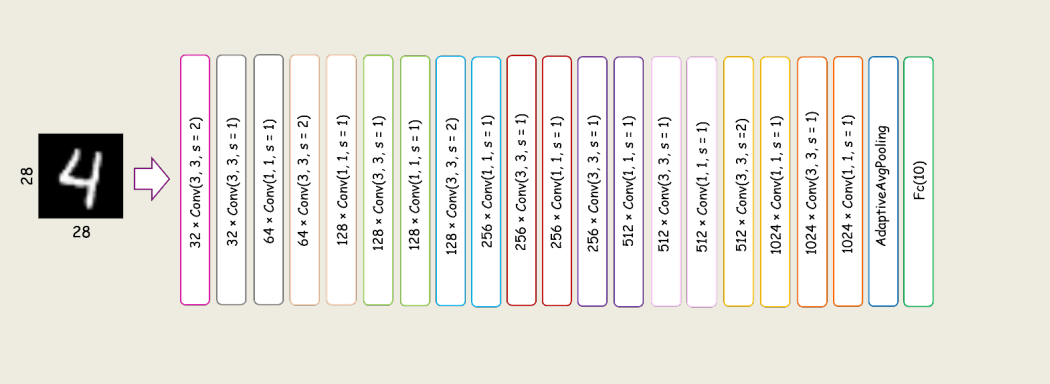

In [ ]:
from PIL import Image

path_img_str = '/content/drive/MyDrive/Colab/Ex_1/1.png'
Image.open(path_img_str)

- - <a name=''>${\small{\color{orange}{\bf{\text{Relationship between input image and output image a Conv2d() layer:}}}}}$</a>


- - - ${\bf{d_{out_{i}} = floor(\; \frac{\; d_{in_{i}} \; + \; 
(\;2\; \times \; padding\;) \; - \; ( \; dilation \; \times \; ( \; k_{size} \; - \; 1\; )\; ) \; - \; 1}{Stride} + 1\;)}}$
- - - ${\bf{D_{out}\;(Full \; Dimension \; of \; Output \; Image) = \text{( No. Out_channels} \; \times \; d_{out_{1}} \; \times d_{out_{2}})}}$

In [ ]:
def Conv2d_output_shape(input_size: tuple, kernel_size: int=1, stride: int=1, pad=0, dilation: int=1) -> tuple:
    
    from math import floor
    if type(kernel_size) is not tuple:
        kernel_size = (kernel_size, kernel_size)
    if type(stride) is not tuple:
        stride = (stride, stride)
    if type(dilation) is not tuple:
        dilation = (dilation, dilation) 
    if type(pad) is not tuple:
        pad = (pad, pad)

    d1 = floor( ((input_size[0] + (2 * pad[0]) - ( dilation[0] * (kernel_size[0] - 1) ) - 1 )/ stride[0]) + 1)
    d2 = floor( ((input_size[1] + (2 * pad[1]) - ( dilation[1] * (kernel_size[1] - 1) ) - 1 )/ stride[1]) + 1)
    output_size = (d1, d2)

    return output_size

In [ ]:
from termcolor import colored

input_size = (24, 24)
kernel_size = 3
stride = 1

pad = 0
dilation = 1

output_size = Conv2d_output_shape(input_size=input_size, kernel_size=kernel_size, stride=stride, pad=pad, dilation=dilation)
print(f'\n{colored("Shape of the output for Conv2d layer for these parameters:", "blue", attrs=["bold"])}\n\n{colored(f"input_size = {input_size}", "green", attrs=["bold"])}\
\n{colored(f"kernel_size = {kernel_size}", attrs=["bold"])}\
\n{colored(f"stride = {stride}", attrs=["bold"])}\n{colored(f"pad = {pad}", attrs=["bold"])}\n\
{colored(f"dilation = {dilation}", attrs=["bold"])}\n\n{colored(f"output_size = {output_size}", "green", attrs=["bold"])}\n')


Shape of the output for Conv2d layer for these parameters:

input_size = (24, 24)
kernel_size = 3
stride = 1
pad = 0
dilation = 1

output_size = (22, 22)



- [x] <a name=''>${{\color{}{\bf{\text{Neural Network Definition}}}}}$</a>

- [ ] <a name=''>${{\color{}{\bf{\text{Random Test}}}}}$</a>

In [ ]:
model_1 = CNN_Net()

In [ ]:
torch.manual_seed(0)
idx_random = torch.randint(low=0, high=49999, size=(1, 1))

img_random, target_random = dataset_MNIST_train[idx_random][0], dataset_MNIST_train[idx_random][1]

img_random = img_random.unsqueeze(0)
img_random = img_random.to(device='cuda')
model_1.to(device='cuda')
prediction = model_1(img_random)

In [ ]:
predicted_class = torch.argmax(prediction)
print(f'\nPrediction: {prediction[0].data}\n\nPredicted Class: {predicted_class}\n\nImage target: {target_random}\n')


Prediction: tensor([-0.9584,  1.3915, -0.7911,  1.3951,  0.6461, -1.7617,  0.8773,  2.7564,
        -0.0821, -1.2672], device='cuda:0')

Predicted Class: 7

Image target: 9



- [x] <a name=''>${{\color{}{\bf{\text{Random Test}}}}}$</a>

- [ ] <a name=''>${{\color{}{\bf{\text{Device Model: GPU}}}}}$</a>

In [ ]:
from torchsummary import summary

In [ ]:
summary(model_1, input_size=(1, 28, 28), batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [64, 32, 14, 14]             320
       BatchNorm2d-2           [64, 32, 14, 14]              64
              ReLU-3           [64, 32, 14, 14]               0
         Dropout2d-4           [64, 32, 14, 14]               0
            Conv2d-5           [64, 32, 14, 14]           9,248
       BatchNorm2d-6           [64, 32, 14, 14]              64
              ReLU-7           [64, 32, 14, 14]               0
         Dropout2d-8           [64, 32, 14, 14]               0
            Conv2d-9           [64, 64, 16, 16]           2,112
      BatchNorm2d-10           [64, 64, 16, 16]             128
             ReLU-11           [64, 64, 16, 16]               0
        Dropout2d-12           [64, 64, 16, 16]               0
           Conv2d-13             [64, 64, 8, 8]          36,928
      BatchNorm2d-14             [64, 6

- [x] <a name=''>${{\color{}{\bf{\text{Device Model: GPU}}}}}$</a>

- [ ] <a name=''>[${\underline{\color{}{\bf{\text{Loss and Optimizer Definition}}}}}$](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)</a>

> - - <a name=''>${\small{\color{red}{\bf{\text{Note:}}}{\color{white}{\bf{\text{ We don't need to use One-Hot Encoding for the labels in Pytorch}}}}}}$</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:

def train_model(model: object, num_epochs: int, optimizer: object, train_loader: torch.utils.data.DataLoader) -> dict:
    
    loss_train_list = []
    loss_val_list = []
    acc_train_list = []
    acc_val_list = []
    model.to(device='cuda')
    for epoch in range(num_epochs):

        # Training Part:
        num_total_train = 0
        num_correct_train = 0
        model.train()
        for x, y in train_loader:

            x, y = x.to(device='cuda'), y.to(device='cuda')
            y_hat = model(x)

            # Training Loss:
            loss_train = criterion(y_hat, y)

            # Training Accuracy:
            _, y_label_hat = torch.max(y_hat.data, 1)
            num_total_train += y.size(0)
            num_correct_train += (y_label_hat == y).sum().item()


            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()


        acc_train = num_correct_train / num_total_train
        loss_train_list.append(loss_train.item())
        acc_train_list.append(acc_train)

        # Validation Part:
        with torch.no_grad():
            model.eval()
            num_total_val = 0
            num_correct_val = 0
            for x, y in val_loader:
                x, y = x.to(device='cuda'), y.to(device='cuda')
                y_hat = model(x)

                # Validation Loss:
                loss_val = criterion(y_hat, y)

                # Validation Accuracy:
                _, y_label_hat = torch.max(y_hat.data, 1)
                num_total_val += y.size(0)
                num_correct_val += (y_label_hat == y).sum().item()

                            
        acc_val = num_correct_val / num_total_val
        loss_val_list.append(loss_val.item())
        acc_val_list.append(acc_val)
        print(f'{colored("Done:", "blue", attrs=["bold"])} {colored(epoch + 1, "green", attrs=["bold"])}/{num_epochs}', end='\r')
        
    trained_model = model
    return loss_train_list, loss_val_list, acc_train_list, acc_val_list, trained_model

    

- <a name=''>${\small{\color{}{\bf{\text{Hyperparameter Tuning:}}}\color{gold}{\underline{\bf{\text{ Using Validation Data }}}}\color{}{{\bf{\text{and}}}}\color{gold}{\underline{\bf{\text{ Independent Approach}}}}}}$</a>



- - <a name=''>[${\underline{\small{\color{}{\bf{\text{Exploring the Initialization Methods}}}}}}$](https://pytorch.org/docs/stable/nn.init.html)</a>



In [ ]:
lr = 0.01
num_epochs = 5
model_selected = CNN_Net()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, _, acc_train, _, _= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=val_loader)

- - - <a name=''>${\small{\color{green}{\bf{\text{For Weighs}}}}}$</a>



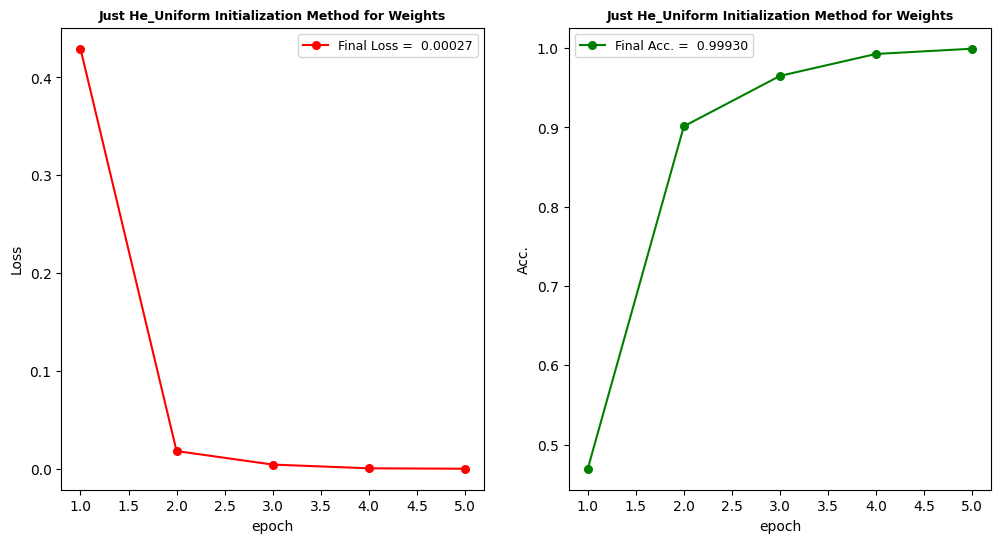

In [ ]:
# He_uniform Initialization Method for Weights and not used any Initilization Method for Biases:
epoch = np.arange(1, num_epochs + 1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, marker='.', markersize=11, label=f'Final Loss = {loss_train[-1]: 0.5f}', color='red')
plt.legend(fontsize=9)
plt.title('Just He_Uniform Initialization Method for Weights', fontweight='bold', fontsize=9, color='black'), plt.ylabel('Loss'), plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, marker='.', markersize=11, label=f'Final Acc. = {acc_train[-1]: 0.5f}', color='green')
plt.legend(fontsize=9)
plt.title('Just He_Uniform Initialization Method for Weights', fontweight='bold', fontsize=9, color='black'), plt.ylabel('Acc.'), plt.xlabel('epoch')
plt.show()

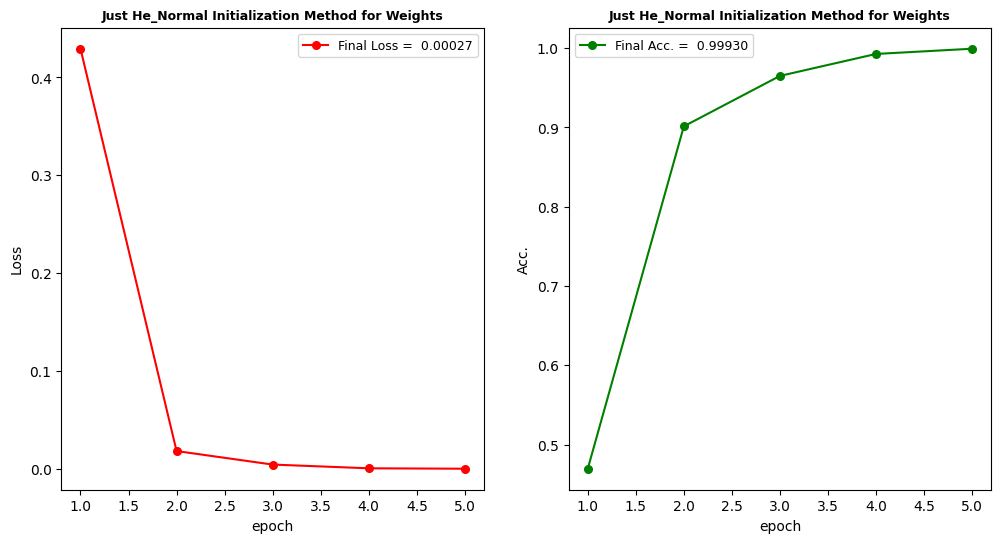

In [ ]:
# He_Normal Initialization Method for Weights and not used any Initilization Method for Biases:
epoch = np.arange(1, num_epochs + 1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, marker='.', markersize=11, label=f'Final Loss = {loss_train[-1]: 0.5f}', color='red')
plt.legend(fontsize=9)
plt.title('Just He_Normal Initialization Method for Weights', fontweight='bold', fontsize=9, color='black'), plt.ylabel('Loss'), plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, marker='.', markersize=11, label=f'Final Acc. = {acc_train[-1]: 0.5f}', color='green')
plt.legend(fontsize=9)
plt.title('Just He_Normal Initialization Method for Weights', fontweight='bold', fontsize=9, color='black'), plt.ylabel('Acc.'), plt.xlabel('epoch')
plt.show()

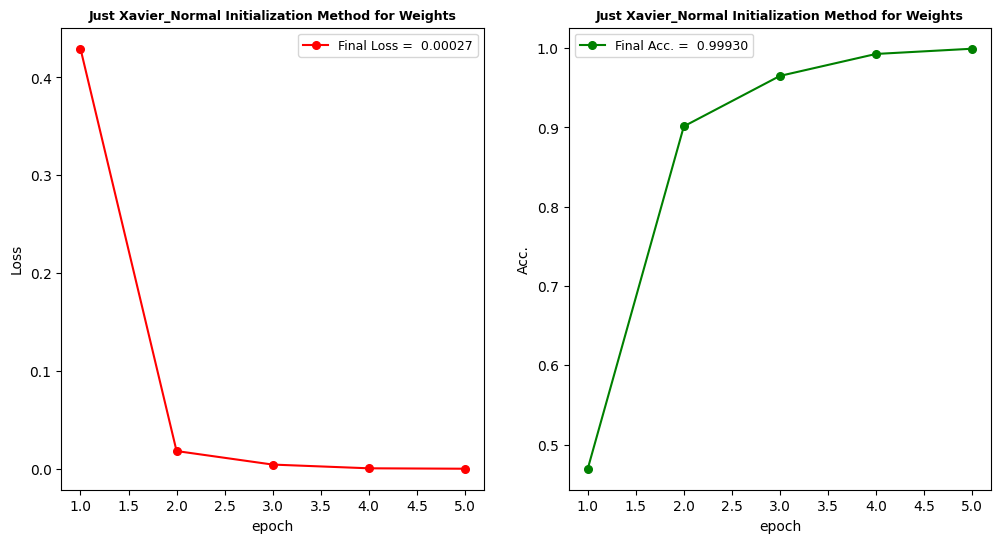

In [ ]:
# Xavier_Normal Initialization Method for Weights and not used any Initilization Method for Biases:
epoch = np.arange(1, num_epochs + 1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, marker='.', markersize=11, label=f'Final Loss = {loss_train[-1]: 0.5f}', color='red')
plt.legend(fontsize=9)
plt.title('Just Xavier_Normal Initialization Method for Weights', fontweight='bold', fontsize=9, color='black'), plt.ylabel('Loss'), plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, marker='.', markersize=11, label=f'Final Acc. = {acc_train[-1]: 0.5f}', color='green')
plt.legend(fontsize=9)
plt.title('Just Xavier_Normal Initialization Method for Weights', fontweight='bold', fontsize=9, color='black'), plt.ylabel('Acc.'), plt.xlabel('epoch')
plt.show()

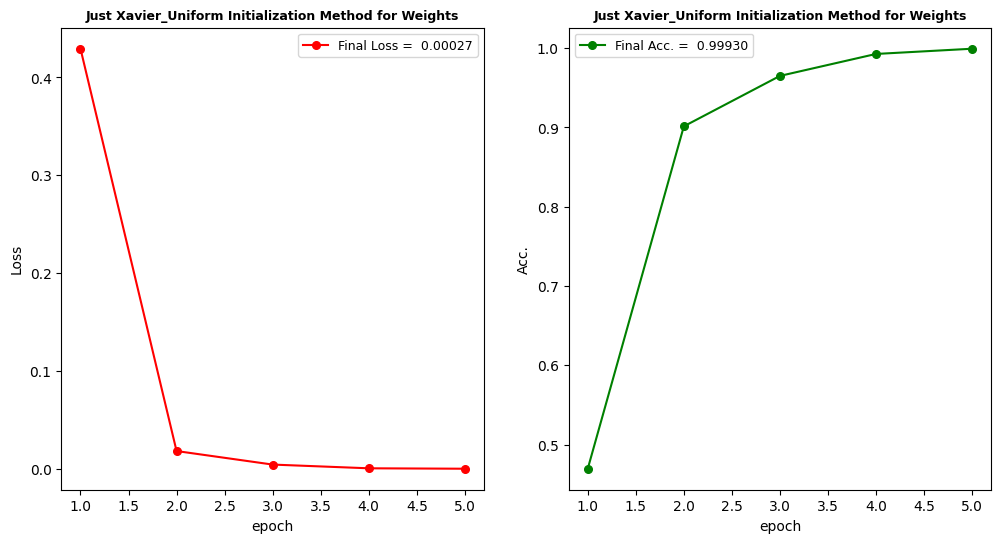

In [ ]:
# Xavier_uniform Initialization Method for Weights and not used any Initilization Method for Biases:
epoch = np.arange(1, num_epochs + 1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, marker='.', markersize=11, label=f'Final Loss = {loss_train[-1]: 0.5f}', color='red')
plt.legend(fontsize=9)
plt.title('Just Xavier_Uniform Initialization Method for Weights', fontweight='bold', fontsize=9, color='black'), plt.ylabel('Loss'), plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, marker='.', markersize=11, label=f'Final Acc. = {acc_train[-1]: 0.5f}', color='green')
plt.legend(fontsize=9)
plt.title('Just Xavier_Uniform Initialization Method for Weights', fontweight='bold', fontsize=9, color='black'), plt.ylabel('Acc.'), plt.xlabel('epoch')
plt.show()

- - - <a name=''>${\small{\color{}{\bf{\text{Selected Initialization Method for Weights: }}}\color{gold}{\bf{\text{Xavier_uniform Initialization}}}}}$</a>



- - - <a name=''>${\small{\color{green}{\bf{\text{For Biases}}}}}$</a>



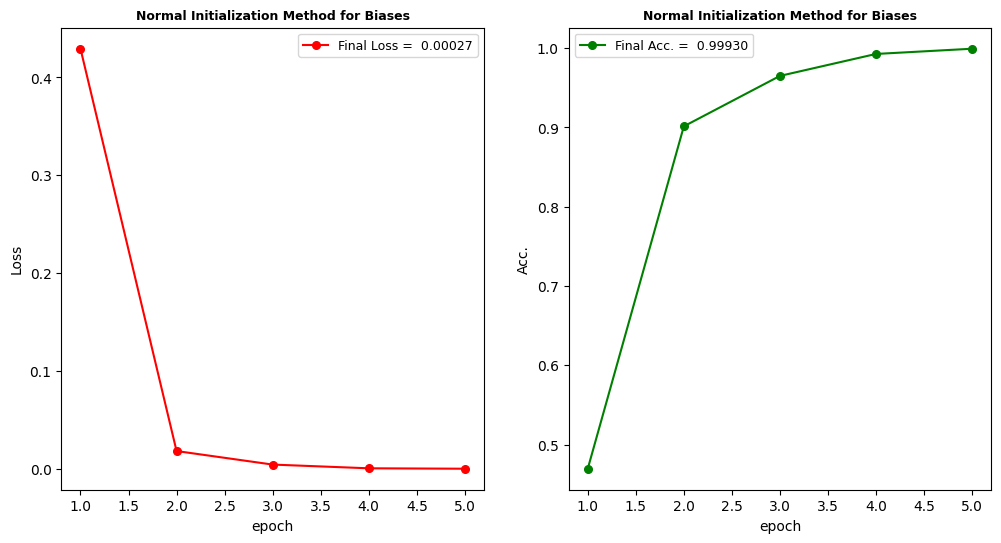

In [ ]:
# Normal Initialization Method for Biases and xavier_uniform Initilization Method for Weights:
epoch = np.arange(1, num_epochs + 1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, marker='.', markersize=11, label=f'Final Loss = {loss_train[-1]: 0.5f}', color='red')
plt.legend(fontsize=9)
plt.title('Normal Initialization Method for Biases', fontweight='bold', fontsize=9, color='black'), plt.ylabel('Loss'), plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, marker='.', markersize=11, label=f'Final Acc. = {acc_train[-1]: 0.5f}', color='green')
plt.legend(fontsize=9)
plt.title('Normal Initialization Method for Biases', fontweight='bold', fontsize=9, color='black'), plt.ylabel('Acc.'), plt.xlabel('epoch')
plt.show()

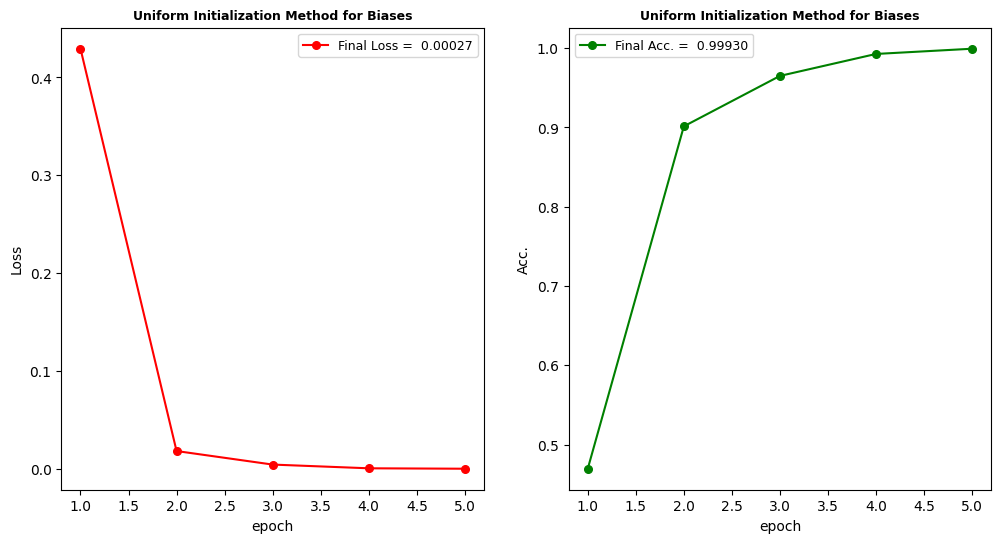

In [ ]:
# Uniform Initialization Method for Biases and xavier_uniform Initilization Method for Weights:
epoch = np.arange(1, num_epochs + 1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, marker='.', markersize=11, label=f'Final Loss = {loss_train[-1]: 0.5f}', color='red')
plt.legend(fontsize=9)
plt.title('Uniform Initialization Method for Biases', fontweight='bold', fontsize=9, color='black'), plt.ylabel('Loss'), plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, marker='.', markersize=11, label=f'Final Acc. = {acc_train[-1]: 0.5f}', color='green')
plt.legend(fontsize=9)
plt.title('Uniform Initialization Method for Biases', fontweight='bold', fontsize=9, color='black'), plt.ylabel('Acc.'), plt.xlabel('epoch')
plt.show()

- - - <a name=''>${\small{\color{}{\bf{\text{Selected Initialization Method for Biases: }}}\color{gold}{\bf{\text{Normal Initialization}}}}}$</a>



- - <a name=''>${\small{\color{cyan}{\bf{\text{LR Tuning}}}}}$</a>



In [ ]:
num_epochs = 5
loss_dict = {}
acc_dict = {}
lr_list = [0.01, 0.3, 0.6, 1]
# lr_list = [0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1]
model = CNN_Net()
for lr in lr_list:

    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    loss_dict[str(lr)], _, acc_dict[str(lr)], _, _ = train_model(model=model, num_epochs=5, optimizer=optimizer, train_loader=val_loader)



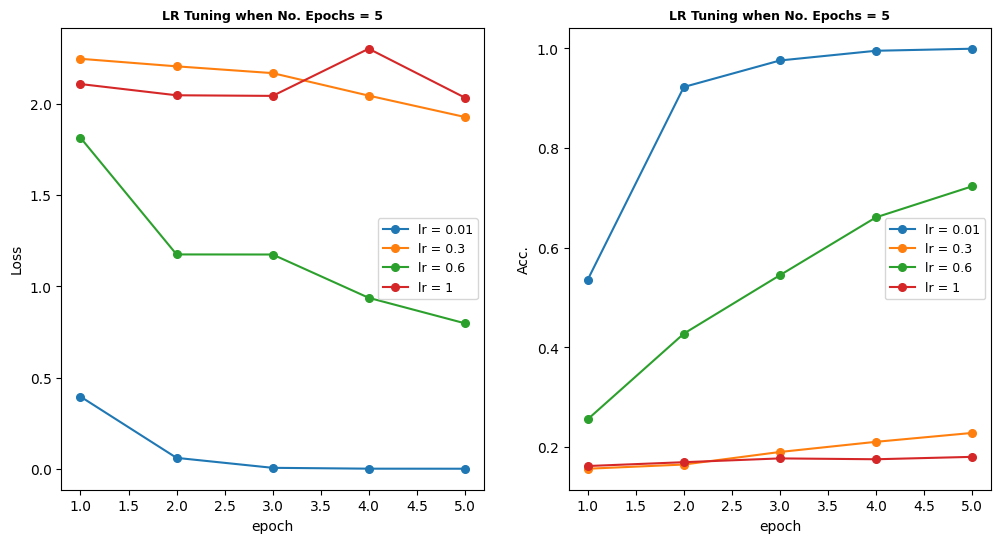

In [ ]:
epoch = np.arange(1, num_epochs + 1)
for lr in lr_list:

    plt.figure(1, figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epoch, loss_dict[str(lr)], label=f'lr = {lr}', marker='.', markersize=11)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.title(f'LR Tuning when No. Epochs = {num_epochs}', fontweight='bold', color='black', fontsize=9)
    plt.legend(fontsize=9)

    plt.subplot(1, 2, 2)
    plt.plot(epoch, acc_dict[str(lr)], label=f'lr = {lr}', marker='.', markersize=11)
    plt.ylabel('Acc.')
    plt.xlabel('epoch')
    plt.title(f'LR Tuning when No. Epochs = {num_epochs}', fontweight='bold', color='black', fontsize=9)
    plt.legend(fontsize=9)


plt.show()

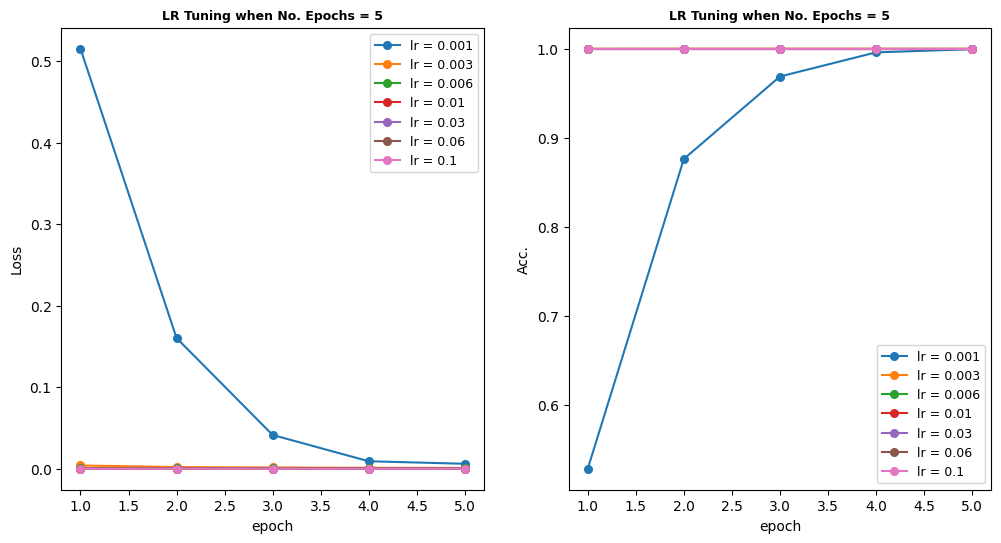

In [ ]:
epoch = np.arange(1, num_epochs + 1)
for lr in lr_list:

    plt.figure(1, figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epoch, loss_dict[str(lr)], label=f'lr = {lr}', marker='.', markersize=11)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.title(f'LR Tuning when No. Epochs = {num_epochs}', fontweight='bold', color='black', fontsize=9)
    plt.legend(fontsize=9)

    plt.subplot(1, 2, 2)
    plt.plot(epoch, acc_dict[str(lr)], label=f'lr = {lr}', marker='.', markersize=11)
    plt.ylabel('Acc.')
    plt.xlabel('epoch')
    plt.title(f'LR Tuning when No. Epochs = {num_epochs}', fontweight='bold', color='black', fontsize=9)
    plt.legend(fontsize=9)


plt.show()

> - - - <a name=''>${\small{\color{red}{\bf{\text{Conclusion: }}}{\color{white}{\small{\bf{\text{LR}^{*} = 0.01}}}}}}$</a>

- [x] <a name=''>${{\color{}{\bf{\text{Loss and Optimizer Definition}}}}}$</a>

- [ ] <a name=''>${{\color{}{\bf{\text{Training }}}{}}}$</a>

In [ ]:
lr_best = 0.01
num_epochs = 10
model = CNN_Net()
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)
loss_train, loss_val, acc_train, acc_val, _ = train_model(model=model, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

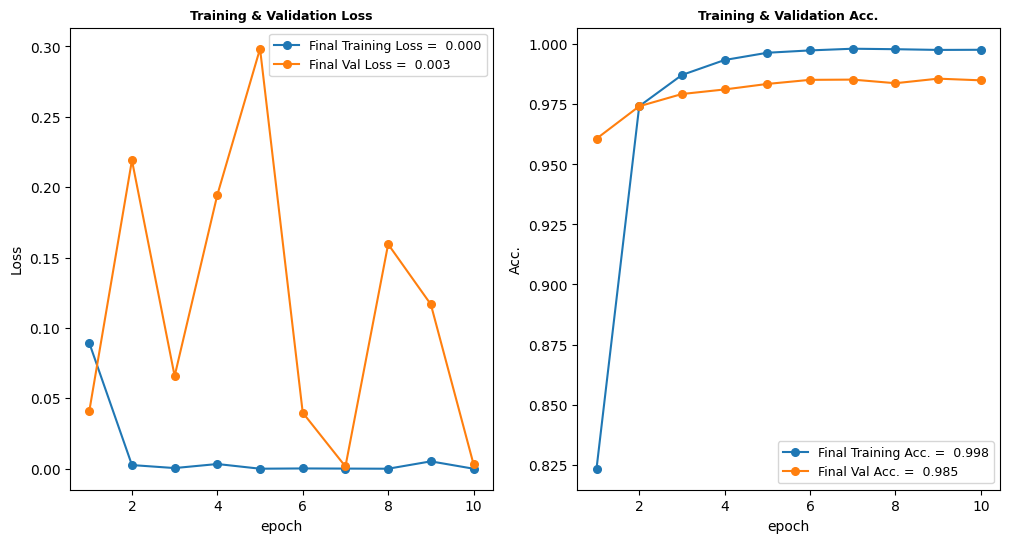

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title('Training & Validation Loss', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc.', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

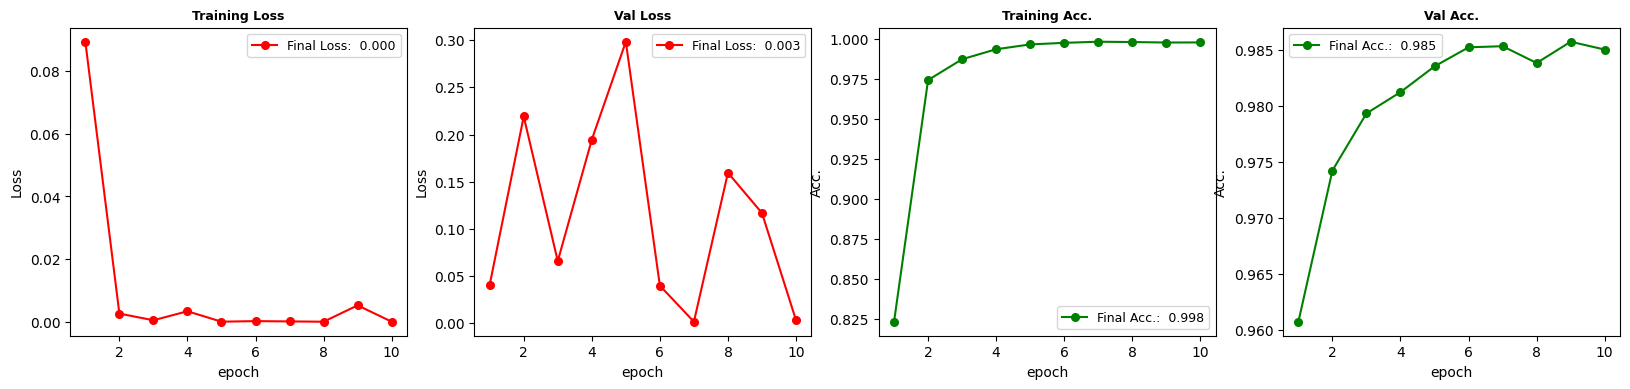

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(20, 4))
plt.subplot(1, 4, 1)
plt.plot(epoch, loss_train, marker='.', markersize=11, color='red', label=f'Final Loss: {loss_train[-1]: 0.3f}')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title('Training Loss', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 4, 2)
plt.plot(epoch, loss_val, marker='.', markersize=11, color='red', label=f'Final Loss: {loss_val[-1]: 0.3f}')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title('Val Loss', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 4, 3)
plt.plot(epoch, acc_train, marker='.', markersize=11, color='green', label=f'Final Acc.: {acc_train[-1]: 0.3f}')
plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training Acc.', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 4, 4)
plt.plot(epoch, acc_val, marker='.', markersize=11, color='green', label=f'Final Acc.: {acc_val[-1]: 0.3f}')
plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Val Acc.', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)
plt.show()

> - - - <a name=''>${\small{\color{red}{\bf{\text{Conclusion: }}}{\color{white}{\small{\underline{\bf{\text{Overfitting}}}}}}}}$</a>

- - <a name=''>${\small{\color{cyan}{\bf{\text{WD Tuning for prevent of the Overfitting}}}}}$</a>



In [ ]:
wd_list = torch.logspace(-4, 4, 9).tolist()
lr_best = 0.01
num_epochs = 10
model = CNN_Net()
final_loss_train, final_loss_val, final_acc_train, final_acc_val = [], [], [], []
loss_train_dict, loss_val_dict, acc_train_dict, acc_val_dict = {}, {}, {}, {}
for wd in wd_list:
    optimizer = torch.optim.SGD(params=model.parameters(), lr=lr_best, weight_decay=wd)
    loss_train_dict[str(wd)], loss_val_dict[str(wd)], acc_train_dict[str(wd)], acc_val_dict[str(wd)], _ = \
    train_model(model=model, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

    final_loss_train.append(loss_train_dict[str(wd)][-1])
    final_loss_val.append(loss_val_dict[str(wd)][-1])
    final_acc_train.append(acc_train_dict[str(wd)][-1])
    final_acc_val.append(acc_val_dict[str(wd)][-1])

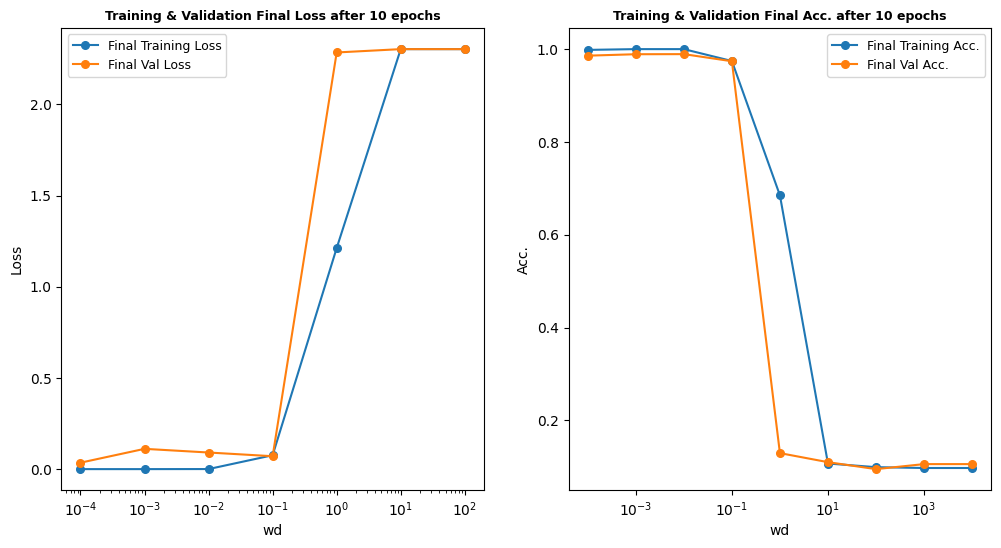

In [ ]:
plt.figure(1, figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.semilogx(wd_list, final_loss_train, label=f'Final Training Loss', marker='.', markersize=11)
plt.semilogx(wd_list, final_loss_val, label=f'Final Val Loss', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('wd')
plt.title(f'Training & Validation Final Loss after {num_epochs} epochs', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.semilogx(wd_list, final_acc_train, label=f'Final Training Acc.', marker='.', markersize=11)
plt.semilogx(wd_list, final_acc_val, label=f'Final Val Acc.', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('wd')
plt.title(f'Training & Validation Final Acc. after {num_epochs} epochs', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

> - - - <a name=''>${\small{\color{red}{\bf{\text{Conclusion: }}}{\color{white}{\small{{\bf{\text{WD}^{*} = 0}}}}}}}$</a>

- [x] <a name=''>${{\color{}{\bf{\text{Training}}}}}$</a>

- [ ] <a name=''>${{\color{}{\bf{\text{2nd Training when we using }}}\color{green}{\bf{\text{Dropout}}}}}$</a>

In [ ]:
lr_best = 0.01
num_epochs = 10
model = CNN_Net()
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)
loss_train, loss_val, acc_train, acc_val, trained_model = train_model(model=model, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

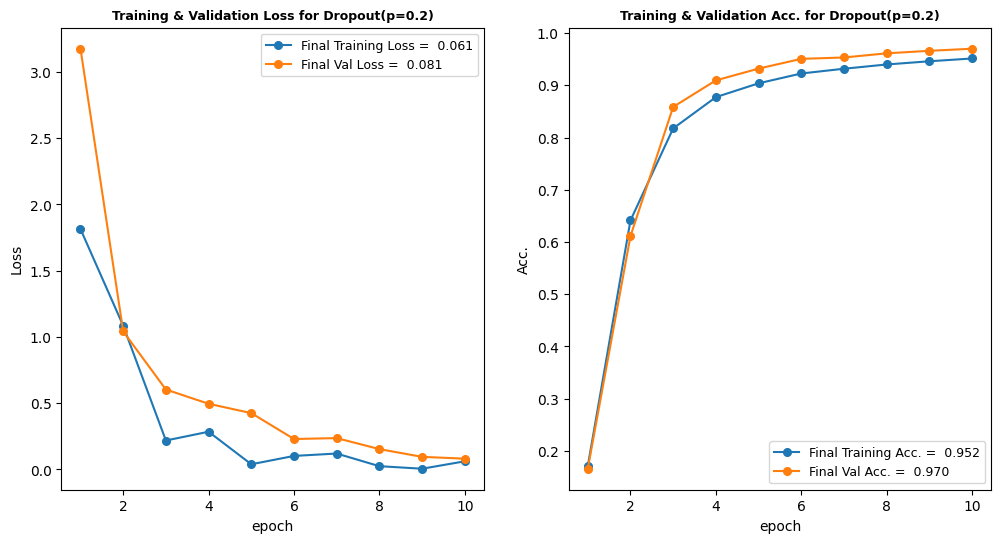

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Dropout(p=0.2)', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Dropout(p=0.2)', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

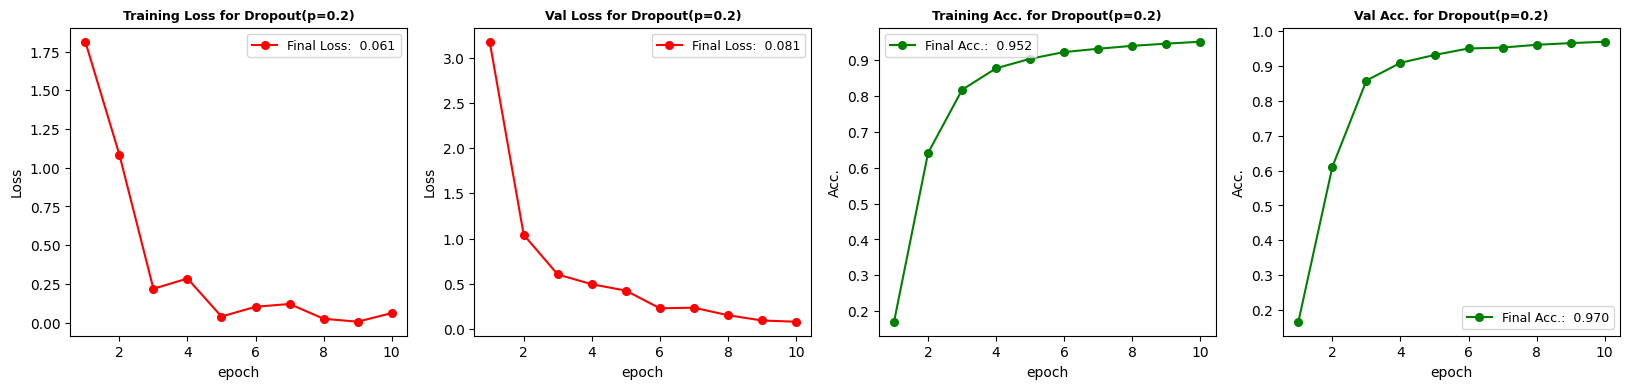

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(20, 4))
plt.subplot(1, 4, 1)
plt.plot(epoch, loss_train, marker='.', markersize=11, color='red', label=f'Final Loss: {loss_train[-1]: 0.3f}')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title('Training Loss for Dropout(p=0.2)', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 4, 2)
plt.plot(epoch, loss_val, marker='.', markersize=11, color='red', label=f'Final Loss: {loss_val[-1]: 0.3f}')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title('Val Loss for Dropout(p=0.2)', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 4, 3)
plt.plot(epoch, acc_train, marker='.', markersize=11, color='green', label=f'Final Acc.: {acc_train[-1]: 0.3f}')
plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training Acc. for Dropout(p=0.2)', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 4, 4)
plt.plot(epoch, acc_val, marker='.', markersize=11, color='green', label=f'Final Acc.: {acc_val[-1]: 0.3f}')
plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Val Acc. for Dropout(p=0.2)', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)
plt.show()

- [x] <a name=''>${{\color{}{\bf{\text{2nd Training}}}}}$</a>

- [ ] <a name=''>${{\color{}{\bf{\text{Test}}}}}$</a>

In [ ]:
def test_model(model: object, optimizer: object, test_loader: torch.utils.data.DataLoader) -> float:

    with torch.no_grad():
        model.eval()
        model.to(device='cuda')
        num_correct = 0
        num_total = 0
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(device='cuda'), y_test.to(device='cuda')
            y_hat = model(x_test)
            _, y_hat_label = torch.max(y_hat.data, 1)
            num_total += y_test.size(0)
            num_correct += (y_hat_label == y_test).sum().item()

    acc_test = num_correct / num_total

    return acc_test

In [ ]:
lr_best = 0.01
model = trained_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9726



- [x] <a name=''>${{\color{}{\bf{\text{Test}}}}}$</a>

- [ ] <a name=''>${{\color{}{\bf{\text{Saving the Model}}}}}$</a>

In [ ]:
path_model_str = '/content/drive/MyDrive/Colab/Ex_1/model_state_dict'

In [ ]:
# torch.save(trained_model.state_dict(), path_model_str)

In [ ]:
selected_model = CNN_Net()
selected_model.load_state_dict(torch.load(path_model_str))

<All keys matched successfully>

In [ ]:
lr_best = 0.01
model = selected_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9726



- [x] <a name=''>${{\color{}{\bf{\text{Saving the Model}}}}}$</a>

- [ ] <a name=''>${{\color{}{\bf{\text{Simple Linear Model}}}}}$</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
input_dim = 28 * 28
output_dim = 10
class Simple_Linear_Net(nn.Module):
    
    def __init__(self, input_dim: int=input_dim, output_dim: int=output_dim):
        
        super(Simple_Linear_Net, self).__init__()
        self.linear = nn.Linear(in_features=input_dim, out_features=output_dim)
        nn.init.xavier_uniform_(self.linear.weight)
        nn.init.normal_(self.linear.bias)

    def forward(self, x):
        x = x.float()
        x = x.view(x.size(0), -1)
        z = self.linear(x)
        return z

In [ ]:
from torchsummary import summary
linear_model = Simple_Linear_Net()
linear_model.to(device='cuda')
summary(linear_model, input_size=(1, 28, 28), batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [64, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.23
----------------------------------------------------------------


- - <a name=''>${\small{\color{}{\bf{\text{Training}}}}}$</a>

In [ ]:
lr = 0.01
num_epochs = 30
model_selected = Simple_Linear_Net()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

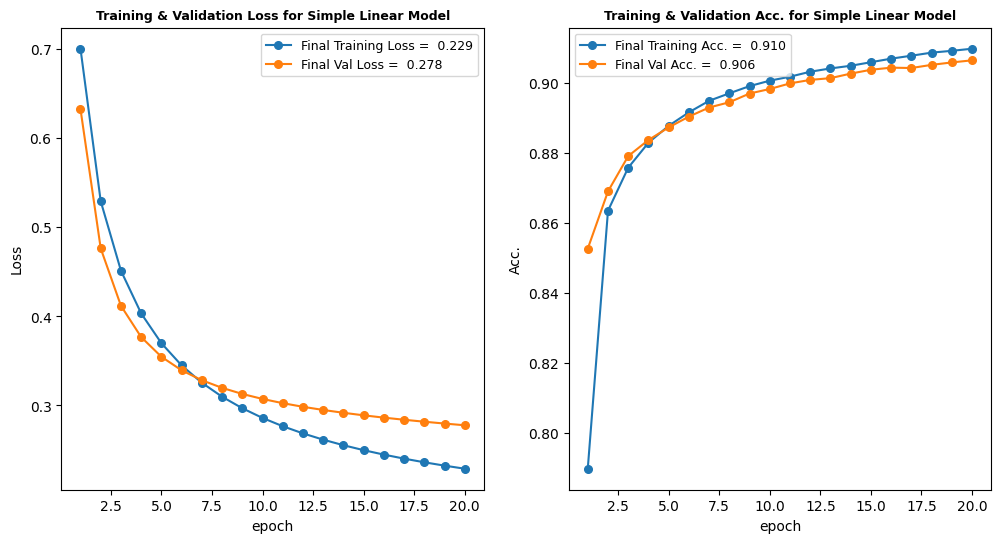

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Simple Linear Model', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Simple Linear Model', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

- - <a name=''>${\small{\color{}{\bf{\text{Test}}}}}$</a>

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9148



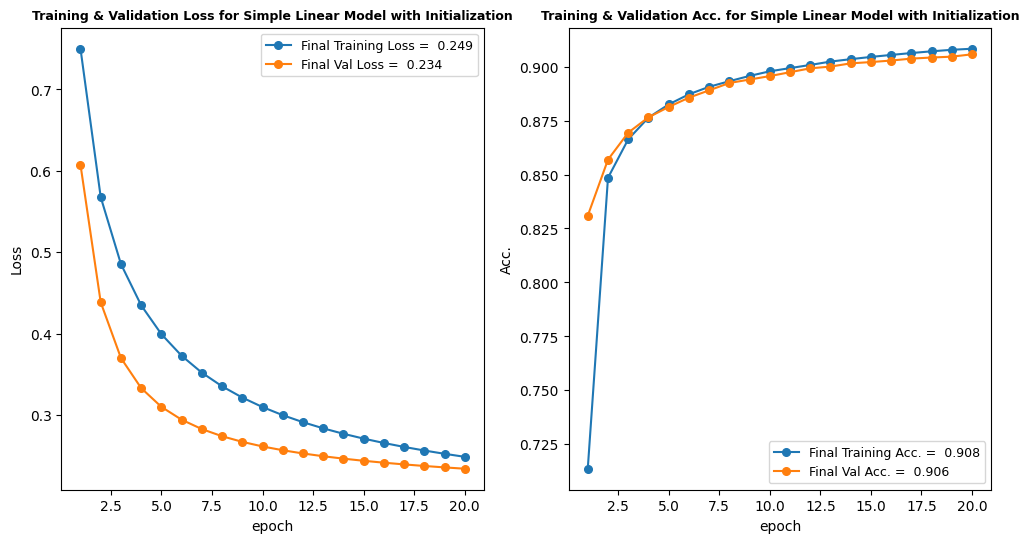

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Simple Linear Model with Initialization', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Simple Linear Model with Initialization', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

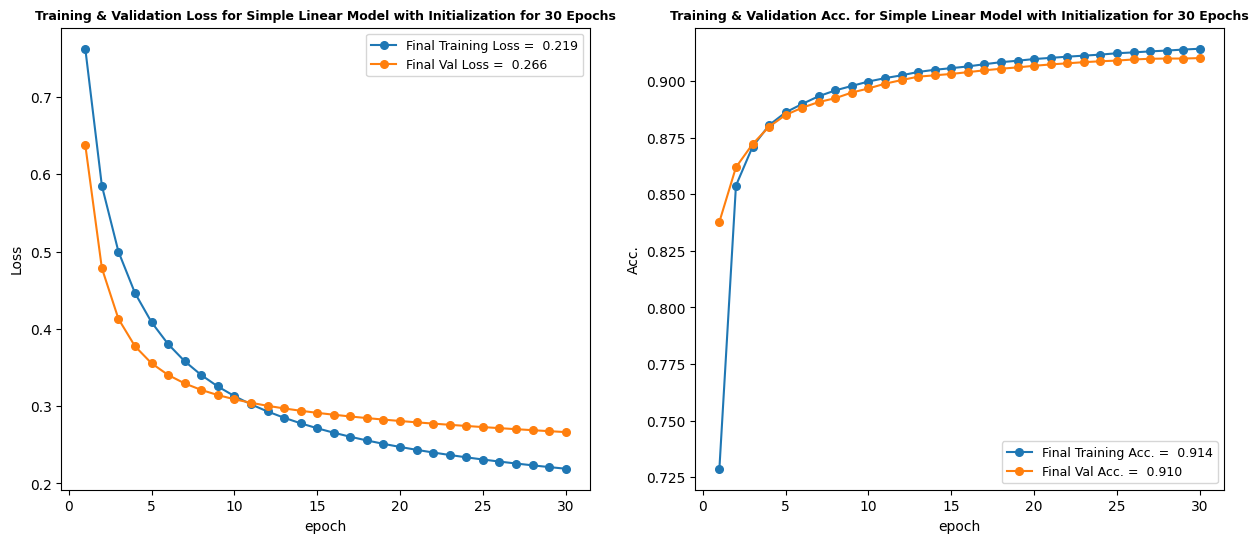

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Simple Linear Model with Initialization for {num_epochs} Epochs', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title(f'Training & Validation Acc. for Simple Linear Model with Initialization for {num_epochs} Epochs', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

- - <a name=''>${\small{\color{}{\bf{\text{Test}}}}}$</a>

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9173



- [x] <a name=''>${{\color{}{\bf{\text{Simple Linear Model}}}}}$</a>

- [ ] <a name=''>${{\color{}{\bf{\text{Linear Model}}}}}$</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
input_dim = 28 * 28
output_H1 = 100
output_dim = 10
class Linear_Net(nn.Module):
    
    def __init__(self, input_dim: int=input_dim, output_H1: int=output_H1, output_dim: int=output_dim):
        
        super(Linear_Net, self).__init__()
        self.linear1 = nn.Linear(in_features=input_dim, out_features=output_H1)
        self.sigmoid1 = nn.Sigmoid()
        self.linear2 = nn.Linear(in_features=output_H1, out_features=output_dim)
        self.sigmoid2 = nn.Sigmoid()

        # Initialization Part:
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

        nn.init.normal_(self.linear1.bias)
        nn.init.normal_(self.linear2.bias)

    def forward(self, x):
        x = x.float()
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = self.sigmoid1(x)
        x = self.linear2(x)
        x = self.sigmoid2(x)
        return x

In [ ]:
linear_model = Linear_Net()

In [ ]:
from torchsummary import summary
linear_model = Linear_Net()
linear_model.to(device='cuda')
summary(linear_model, input_size=(1, 28, 28), batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [64, 100]          78,500
           Sigmoid-2                  [64, 100]               0
            Linear-3                   [64, 10]           1,010
           Sigmoid-4                   [64, 10]               0
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.11
Params size (MB): 0.30
Estimated Total Size (MB): 0.60
----------------------------------------------------------------


- - <a name=''>${\small{\color{}{\bf{\text{Training}}}}}$</a>

In [ ]:
lr = 0.01
num_epochs = 400
model_selected = Linear_Net()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

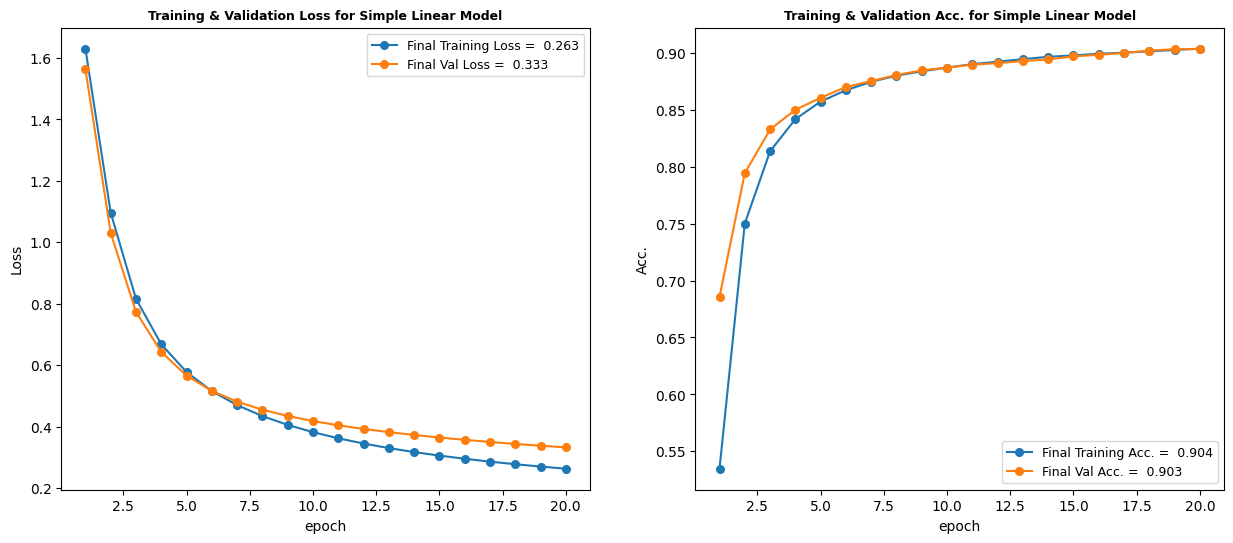

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Simple Linear Model', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Simple Linear Model', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

- - <a name=''>${\small{\color{}{\bf{\text{Adding 1 Sigmoid Activation Function}}}}}$</a>

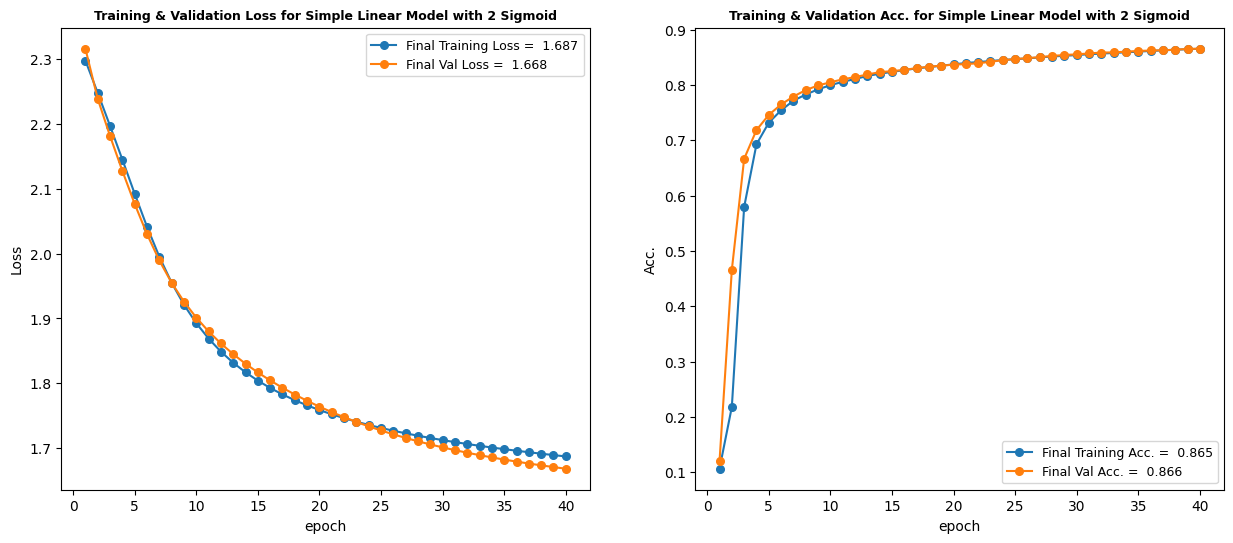

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Simple Linear Model with 2 Sigmoid', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Simple Linear Model with 2 Sigmoid', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

- - <a name=''>${\small{\color{}{\bf{\text{Learning for More No. Epochs}}}}}$</a>

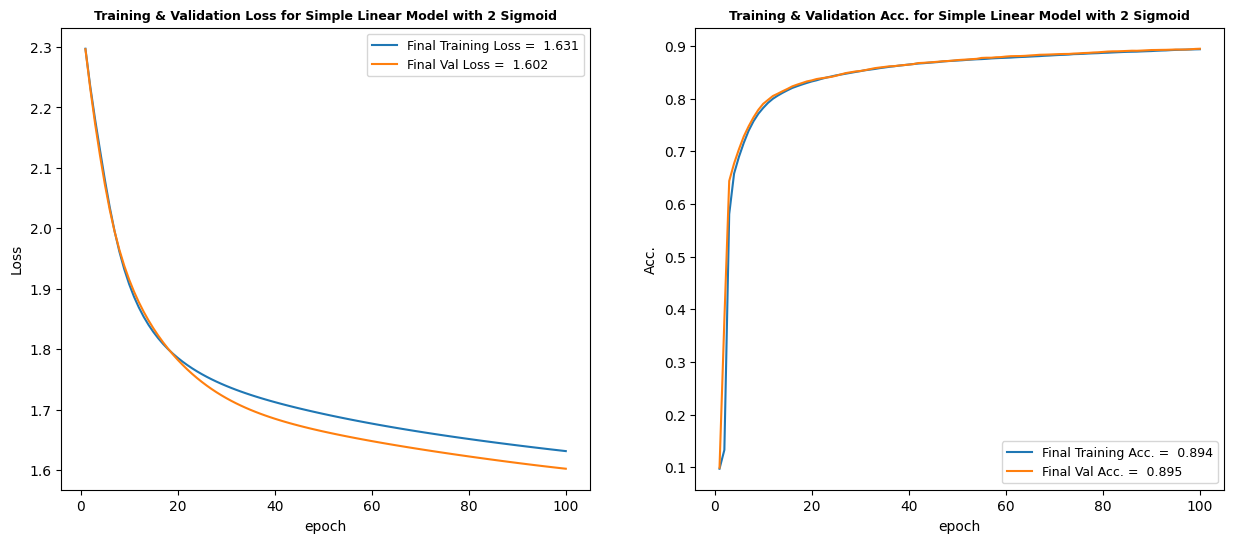

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Simple Linear Model with 2 Sigmoid', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Simple Linear Model with 2 Sigmoid', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

- - <a name=''>${\small{\color{}{\bf{\text{Learning for More No. Epochs}}}}}$</a>

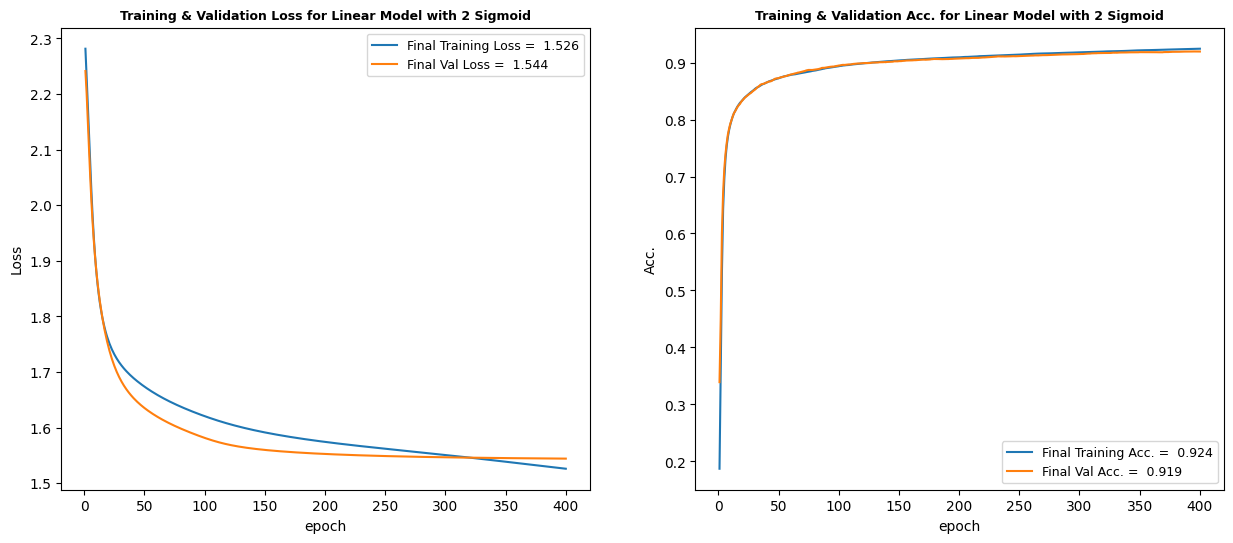

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Linear Model with 2 Sigmoid', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Linear Model with 2 Sigmoid', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

- - <a name='1'>[${\underline{\small{\color{gold}{\bf{\text{Using Tanh Activation Function}}}}}}$](#2)</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
input_dim = 28 * 28
output_H1 = 100
output_dim = 10
class Linear_Net_Tanh(nn.Module):
    
    def __init__(self, input_dim: int=input_dim, output_H1: int=output_H1, output_dim: int=output_dim):
        
        super(Linear_Net_Tanh, self).__init__()
        self.linear1 = nn.Linear(in_features=input_dim, out_features=output_H1)
        self.tanh = nn.Tanh()
        self.linear2 = nn.Linear(in_features=output_H1, out_features=output_dim)

        # Initialization Part:
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

        nn.init.normal_(self.linear1.bias)
        nn.init.normal_(self.linear2.bias)

    def forward(self, x):
        x = x.float()
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = self.tanh(x)
        x = self.linear2(x)
        return x

In [ ]:
lr = 0.01
num_epochs = 100
model_selected = Linear_Net_Tanh()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

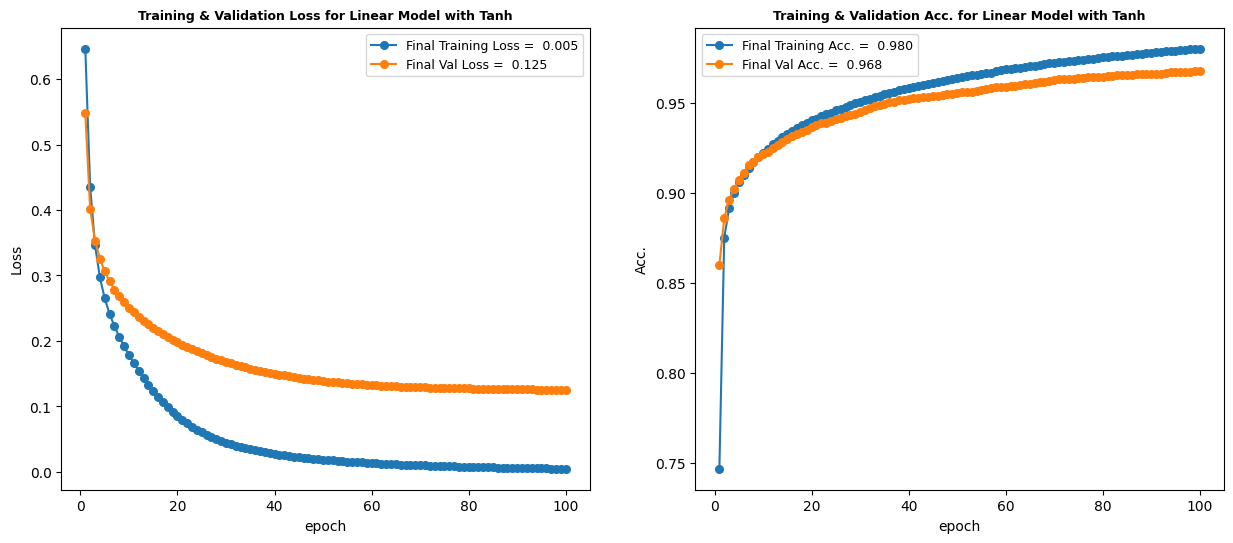

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Linear Model with Tanh', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Linear Model with Tanh', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9689



- - <a name='3'>[${\underline{\small{\color{gold}{\bf{\text{Adding one Sigmoid Activation Function}}}}}}$](#4)</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
input_dim = 28 * 28
output_H1 = 100
output_dim = 10
class Linear_Net_Tanh_Sig(nn.Module):
    
    def __init__(self, input_dim: int=input_dim, output_H1: int=output_H1, output_dim: int=output_dim):
        
        super(Linear_Net_Tanh_Sig, self).__init__()
        self.linear1 = nn.Linear(in_features=input_dim, out_features=output_H1)
        self.tanh1 = nn.Tanh()
        self.linear2 = nn.Linear(in_features=output_H1, out_features=output_dim)
        self.sigmoid2 = nn.Sigmoid()

        # Initialization Part:
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

        nn.init.normal_(self.linear1.bias)
        nn.init.normal_(self.linear2.bias)

    def forward(self, x):
        x = x.float()
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = self.tanh1(x)
        x = self.linear2(x)
        x = self.sigmoid2(x)
        return x

In [ ]:
lr = 0.01
num_epochs = 100
model_selected = Linear_Net_Tanh_Sig()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

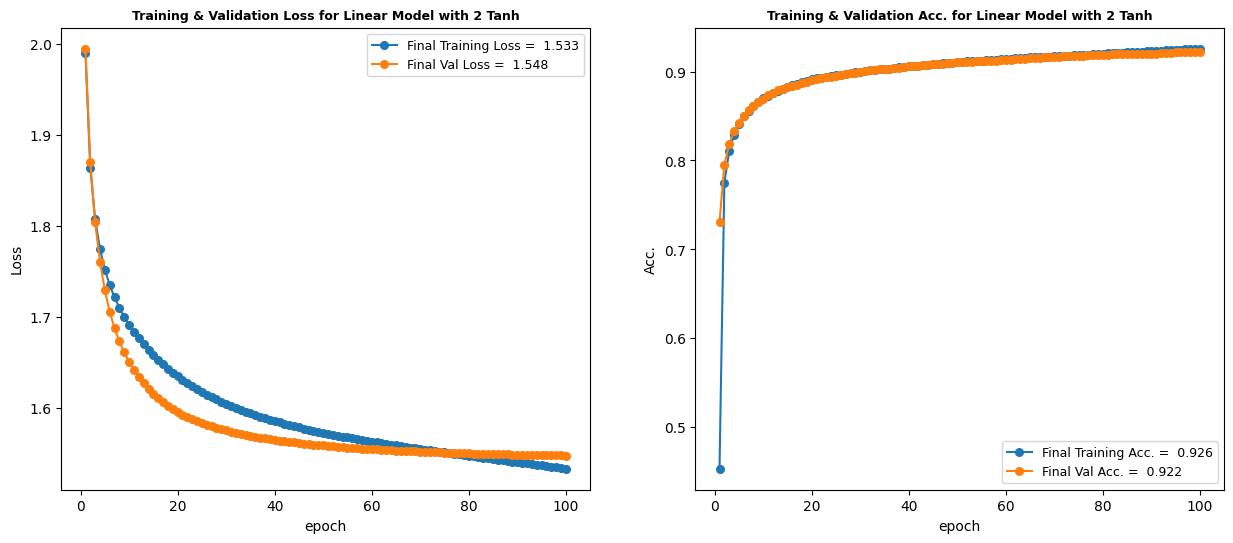

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Linear Model with 2 Tanh', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Linear Model with 2 Tanh', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.927



- - <a name='5'>[${\underline{\small{\color{gold}{\bf{\text{ReLU Activation Function}}}}}}$](#6)</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
input_dim = 28 * 28
output_H1 = 100
output_dim = 10
class Linear_Net_ReLU(nn.Module):
    
    def __init__(self, input_dim: int=input_dim, output_H1: int=output_H1, output_dim: int=output_dim):
        
        super(Linear_Net_ReLU, self).__init__()
        self.linear1 = nn.Linear(in_features=input_dim, out_features=output_H1)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(in_features=output_H1, out_features=output_dim)


        # Initialization Part:
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

        nn.init.normal_(self.linear1.bias)
        nn.init.normal_(self.linear2.bias)

    def forward(self, x):
        x = x.float()
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [ ]:
lr = 0.01
num_epochs = 100
model_selected = Linear_Net_ReLU()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

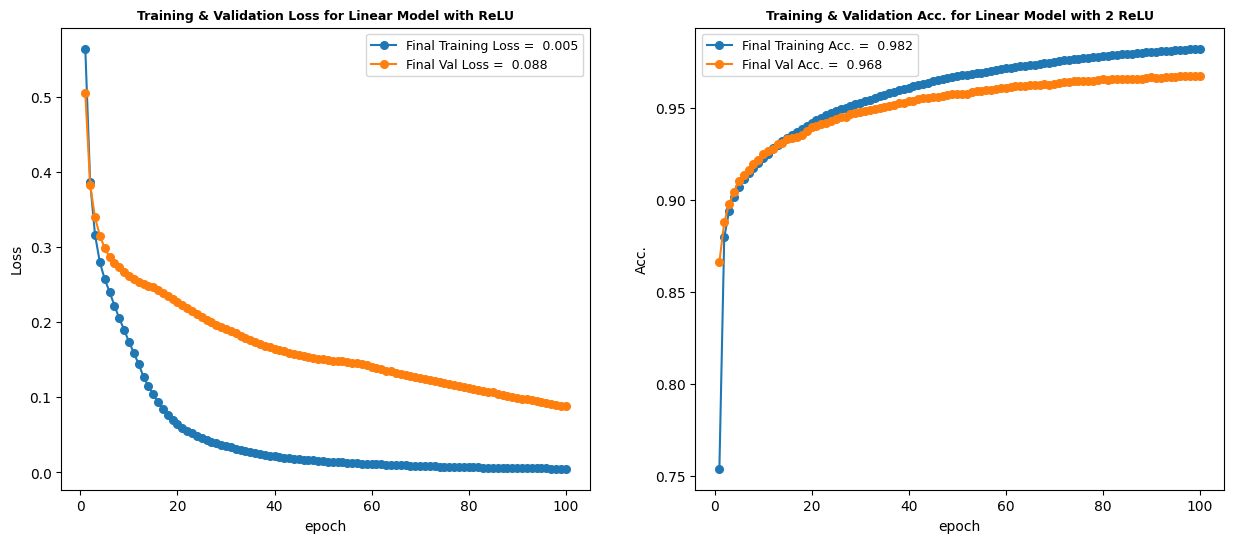

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Linear Model with ReLU', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Linear Model with ReLU', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9709



- - <a name='7'>[${\underline{\small{\color{gold}{\bf{\text{Adding one Sigmoid Activation Function}}}}}}$](#8)</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
input_dim = 28 * 28
output_H1 = 100
output_dim = 10
class Linear_Net_ReLU_Sig(nn.Module):
    
    def __init__(self, input_dim: int=input_dim, output_H1: int=output_H1, output_dim: int=output_dim):
        
        super(Linear_Net_ReLU_Sig, self).__init__()
        self.linear1 = nn.Linear(in_features=input_dim, out_features=output_H1)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(in_features=output_H1, out_features=output_dim)
        self.sigmoid = nn.Sigmoid()

        # Initialization Part:
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

        nn.init.normal_(self.linear1.bias)
        nn.init.normal_(self.linear2.bias)

    def forward(self, x):
        x = x.float()
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.sigmoid(x)
        return x

In [ ]:
lr = 0.01
num_epochs = 400
model_selected = Linear_Net_ReLU_Sig()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

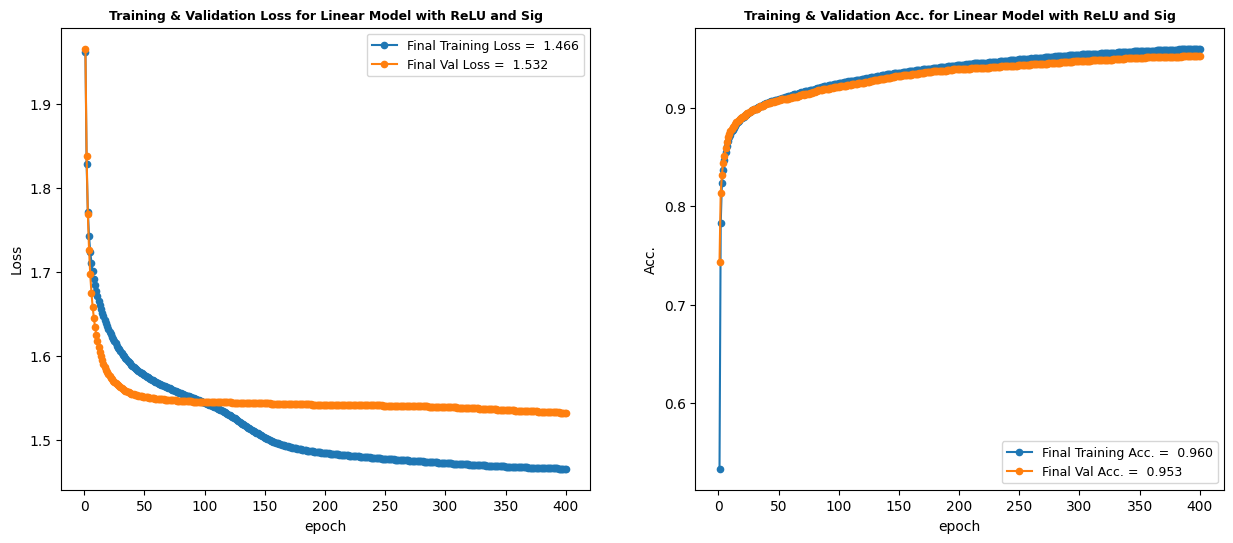

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=9)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=9)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Linear Model with ReLU and Sig', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=9)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=9)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Linear Model with ReLU and Sig', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9562



- - <a name='9'>[${\underline{\small{\color{gold}{\bf{\text{2 Hidden Layer with 2 Tanh Activation Function}}}}}}$](#10)</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
input_dim = 28 * 28
output_H1 = 50
output_H2 = 50
output_dim = 10
class Linear_Net_2H_2Tanh(nn.Module):
    
    def __init__(self, input_dim: int=input_dim, output_H1: int=output_H1, output_H2: int=output_H2, output_dim: int=output_dim):
        
        super(Linear_Net_2H_2Tanh, self).__init__()
        self.linear1 = nn.Linear(in_features=input_dim, out_features=output_H1)
        self.tanh1 = nn.Tanh()
        self.linear2 = nn.Linear(in_features=output_H1, out_features=output_H2)
        self.tanh2 = nn.Tanh()
        self.linear3 = nn.Linear(in_features=output_H2, out_features=output_dim)

        # Initialization Part:
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)
        nn.init.xavier_uniform_(self.linear3.weight)


        nn.init.normal_(self.linear1.bias)
        nn.init.normal_(self.linear2.bias)
        nn.init.normal_(self.linear3.bias)


    def forward(self, x):
        x = x.float()
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = self.tanh1(x)
        x = self.linear2(x)
        x = self.tanh2(x)
        x = self.linear3(x)
        return x

In [ ]:
from torchsummary import summary

In [ ]:
model = Linear_Net_2H_2Tanh()
model.to(device='cuda')
summary(model=model, input_size=(1, 28, 28), batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [64, 50]          39,250
              Tanh-2                   [64, 50]               0
            Linear-3                   [64, 50]           2,550
              Tanh-4                   [64, 50]               0
            Linear-5                   [64, 10]             510
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.10
Params size (MB): 0.16
Estimated Total Size (MB): 0.46
----------------------------------------------------------------


In [ ]:
lr = 0.01
num_epochs = 100
model_selected = Linear_Net_2H_2Tanh()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

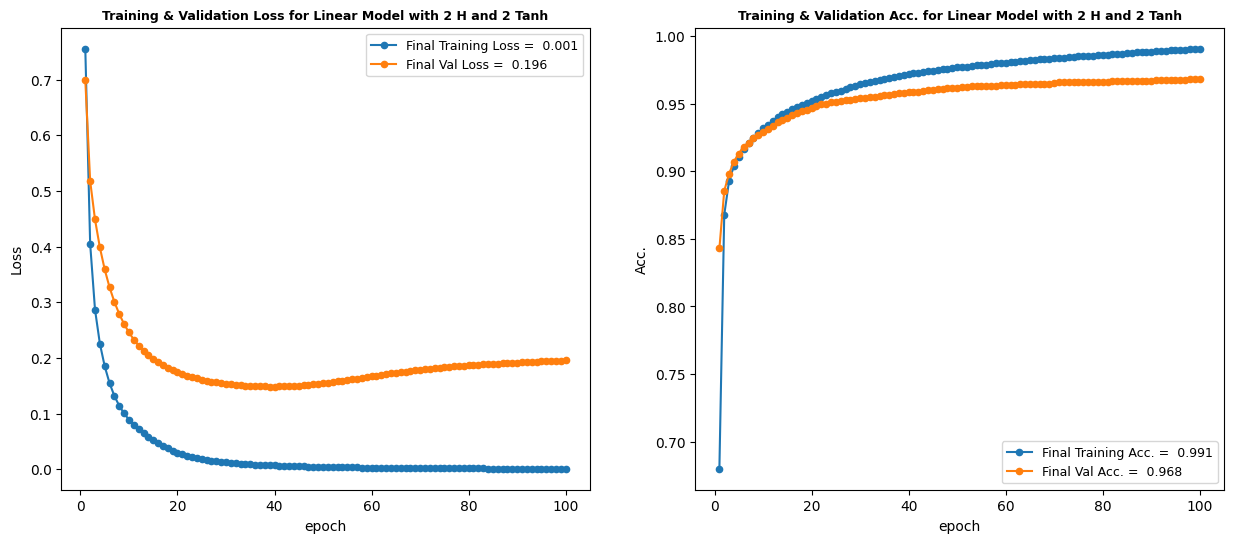

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=9)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=9)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Linear Model with 2 H and 2 Tanh', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=9)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=9)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Linear Model with 2 H and 2 Tanh', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9728



- - <a name=''>${\small{\color{}{\bf{\text{BatchNorm1d}}}}}$</a>

- - - <a name='2'>[${\underline{\small{\color{gold}{\bf{\text{Using Tanh Activation Function + BatchNorm1d}}}}}}$](#1)</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
input_dim = 28 * 28
output_H1 = 100
output_dim = 10
class Linear_Net_Tanh_BatchNorm(nn.Module):
    
    def __init__(self, input_dim: int=input_dim, output_H1: int=output_H1, output_dim: int=output_dim):
        
        super(Linear_Net_Tanh_BatchNorm, self).__init__()

        self.linear1 = nn.Linear(in_features=input_dim, out_features=output_H1)
        self.tanh = nn.Tanh()
        self.dropout1 = nn.Dropout1d(p=0.1)

        self.batchnorm2 = nn.BatchNorm1d(num_features=output_H1)
        self.linear2 = nn.Linear(in_features=output_H1, out_features=output_dim)

        # Initialization Part:
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

        nn.init.normal_(self.linear1.bias)
        nn.init.normal_(self.linear2.bias)

    def forward(self, x):
        x = x.float()
        x = x.view(x.size(0), -1)

        x = self.linear1(x)
        x = self.tanh(x)
        x = self.dropout1(x)

        x = self.batchnorm2(x)
        x = self.linear2(x)
        return x

In [ ]:
lr = 0.01
num_epochs = 100
model_selected = Linear_Net_Tanh_BatchNorm()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

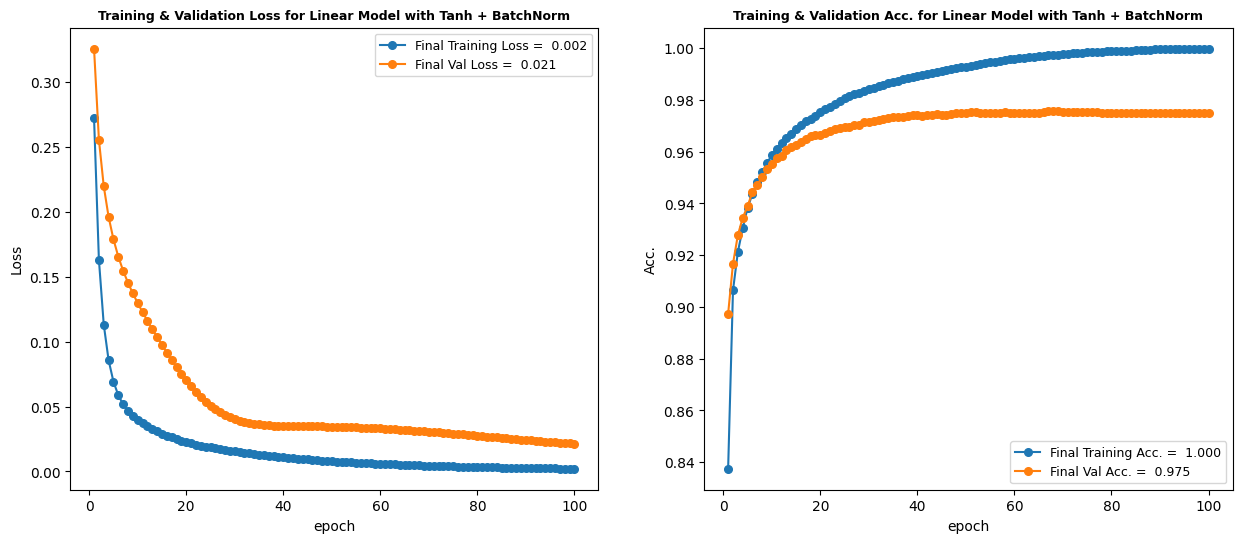

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Linear Model with Tanh + BatchNorm', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Linear Model with Tanh + BatchNorm', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9763



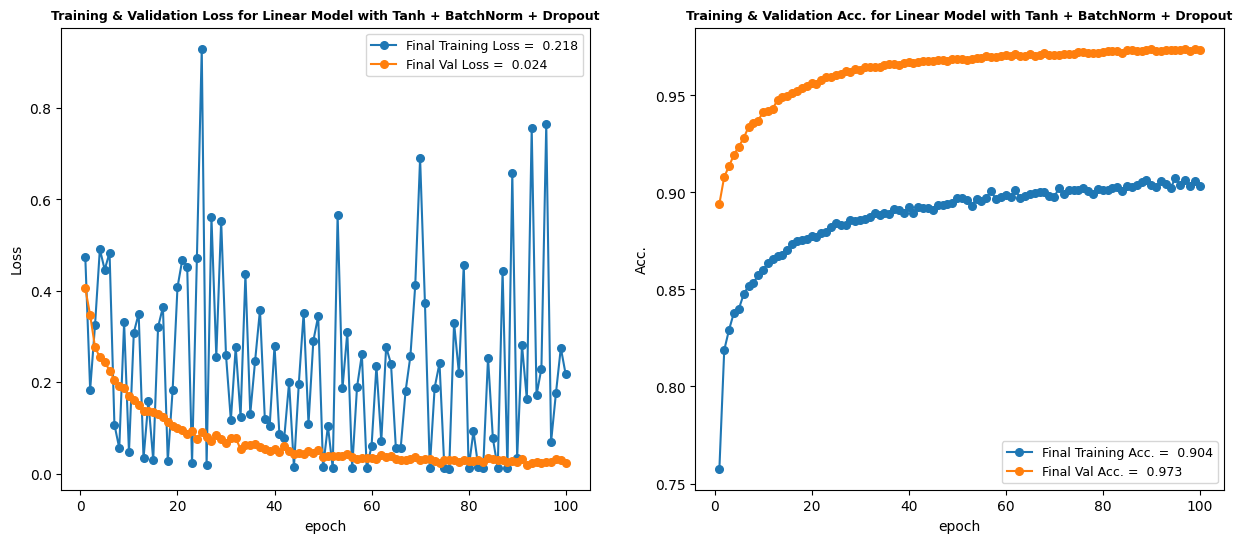

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Linear Model with Tanh + BatchNorm + Dropout', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Linear Model with Tanh + BatchNorm + Dropout', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9758



> - - - <a name=''>${\small{\color{red}{\bf{\text{Conclusion: }}}{\color{white}{\small{{\bf{\text{Don't Use of Dropout for this Network}}}}}}}}$</a>

- - <a name='4'>[${\underline{\small{\color{gold}{\bf{\text{Adding one Sigmoid Activation Function + BatchNorm1d}}}}}}$](#3)</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
input_dim = 28 * 28
output_H1 = 100
output_dim = 10
class Linear_Net_Tanh_Sig_BatchNorm(nn.Module):
    
    def __init__(self, input_dim: int=input_dim, output_H1: int=output_H1, output_dim: int=output_dim):
        
        super(Linear_Net_Tanh_Sig_BatchNorm, self).__init__()
        self.linear1 = nn.Linear(in_features=input_dim, out_features=output_H1)
        self.tanh1 = nn.Tanh()
        self.batchnorm = nn.BatchNorm1d(num_features=output_H1)
        self.linear2 = nn.Linear(in_features=output_H1, out_features=output_dim)
        self.sigmoid2 = nn.Sigmoid()

        # Initialization Part:
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

        nn.init.normal_(self.linear1.bias)
        nn.init.normal_(self.linear2.bias)

    def forward(self, x):
        x = x.float()
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = self.tanh1(x)
        x = self.batchnorm(x)
        x = self.linear2(x)
        x = self.sigmoid2(x)
        return x

In [ ]:
lr = 0.01
num_epochs = 100
model_selected = Linear_Net_Tanh_Sig_BatchNorm()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

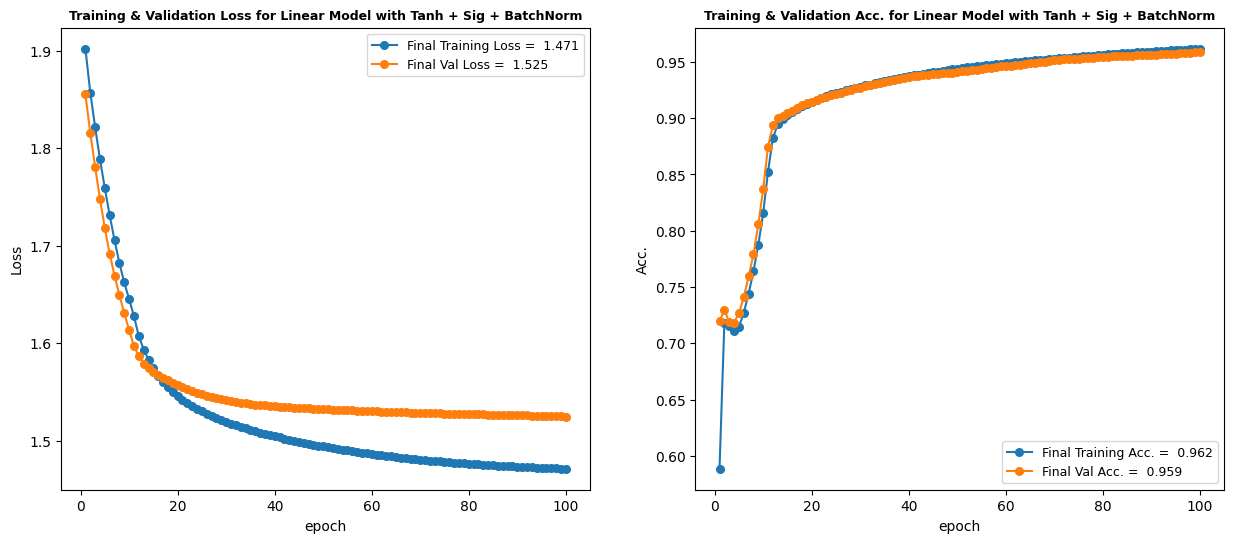

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Linear Model with Tanh + Sig + BatchNorm', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Linear Model with Tanh + Sig + BatchNorm', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9585



- - <a name='6'>[${\underline{\small{\color{gold}{\bf{\text{ReLU Activation Function + BatchNorm1d}}}}}}$](#5)</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
input_dim = 28 * 28
output_H1 = 100
output_dim = 10
class Linear_Net_ReLU_BatchNorm(nn.Module):
    
    def __init__(self, input_dim: int=input_dim, output_H1: int=output_H1, output_dim: int=output_dim):
        
        super(Linear_Net_ReLU_BatchNorm, self).__init__()
        self.linear1 = nn.Linear(in_features=input_dim, out_features=output_H1)
        self.relu = nn.ReLU()
        self.batchnorm = nn.BatchNorm1d(num_features=output_H1)
        self.linear2 = nn.Linear(in_features=output_H1, out_features=output_dim)


        # Initialization Part:
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

        nn.init.normal_(self.linear1.bias)
        nn.init.normal_(self.linear2.bias)

    def forward(self, x):
        x = x.float()
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.batchnorm(x)
        x = self.linear2(x)
        return x

In [ ]:
lr = 0.01
num_epochs = 100
model_selected = Linear_Net_ReLU_BatchNorm()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

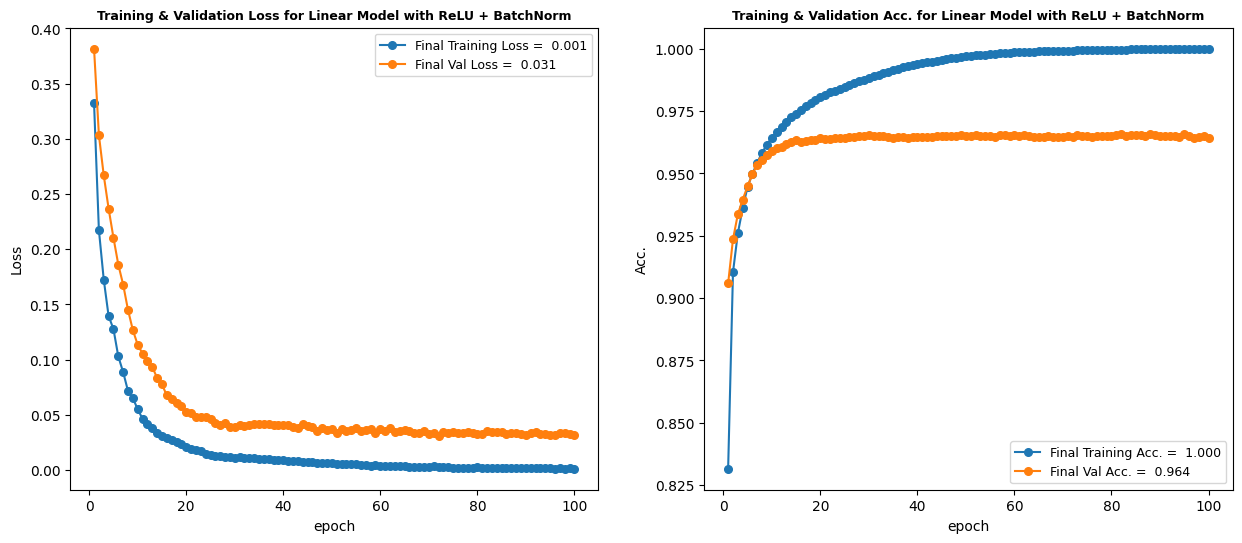

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Linear Model with ReLU + BatchNorm', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Linear Model with ReLU + BatchNorm', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9673



- - <a name='8'>[${\underline{\small{\color{gold}{\bf{\text{Adding one Sigmoid Activation Function + BatchNorm1d}}}}}}$](#7)</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
input_dim = 28 * 28
output_H1 = 100
output_dim = 10
class Linear_Net_ReLU_Sig_BatchNorm(nn.Module):
    
    def __init__(self, input_dim: int=input_dim, output_H1: int=output_H1, output_dim: int=output_dim):
        
        super(Linear_Net_ReLU_Sig_BatchNorm, self).__init__()
        self.linear1 = nn.Linear(in_features=input_dim, out_features=output_H1)
        self.relu = nn.ReLU()
        self.batchnorm = nn.BatchNorm1d(num_features=output_H1)
        self.linear2 = nn.Linear(in_features=output_H1, out_features=output_dim)
        self.sigmoid = nn.Sigmoid()

        # Initialization Part:
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

        nn.init.normal_(self.linear1.bias)
        nn.init.normal_(self.linear2.bias)

    def forward(self, x):
        x = x.float()
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.batchnorm(x)
        x = self.linear2(x)
        x = self.sigmoid(x)
        return x

In [ ]:
lr = 0.01
num_epochs = 100
model_selected = Linear_Net_ReLU_Sig_BatchNorm()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

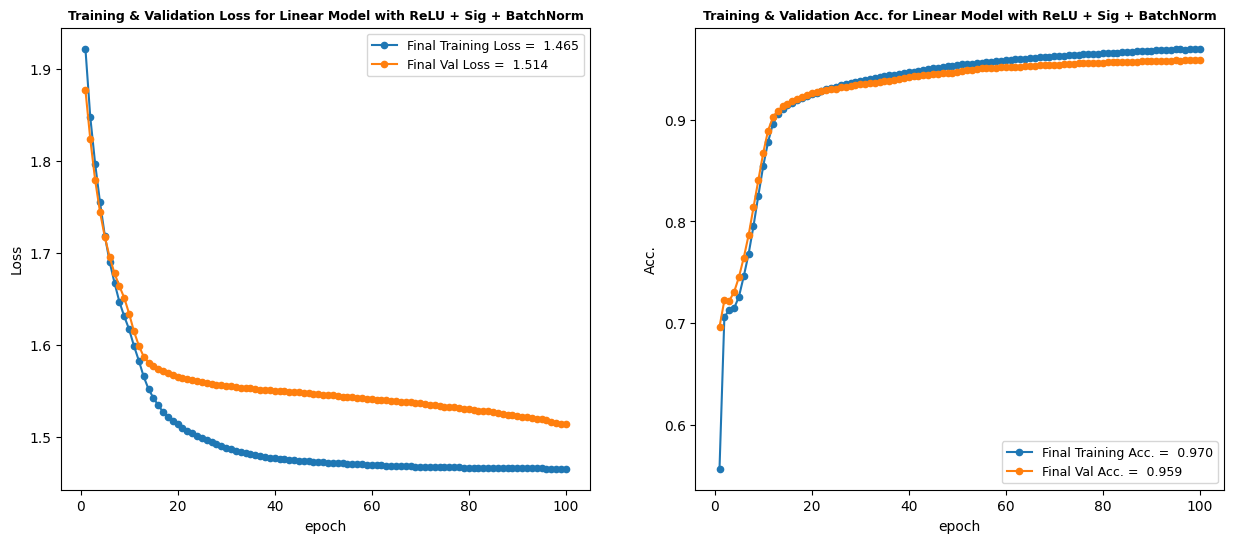

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=9)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=9)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Linear Model with ReLU + Sig + BatchNorm', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=9)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=9)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Linear Model with ReLU + Sig + BatchNorm', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9611



- - <a name='10'>[${\underline{\small{\color{gold}{\bf{\text{2 Hidden Layer with 2 Tanh Activation Function + BatchNorm1d}}}}}}$](#9)</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
input_dim = 28 * 28
output_H1 = 50
output_H2 = 50
output_dim = 10
class Linear_Net_2H_2Tanh_BatchNorm(nn.Module):
    
    def __init__(self, input_dim: int=input_dim, output_H1: int=output_H1, output_H2: int=output_H2, output_dim: int=output_dim):
        
        super(Linear_Net_2H_2Tanh_BatchNorm, self).__init__()
        self.linear1 = nn.Linear(in_features=input_dim, out_features=output_H1)
        self.tanh1 = nn.Tanh()

        self.batchnorm1 = nn.BatchNorm1d(num_features=output_H1)
        self.linear2 = nn.Linear(in_features=output_H1, out_features=output_H2)
        self.tanh2 = nn.Tanh()

        self.batchnorm2 = nn.BatchNorm1d(num_features=output_H2)
        self.linear3 = nn.Linear(in_features=output_H2, out_features=output_dim)

        # Initialization Part:
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)
        nn.init.xavier_uniform_(self.linear3.weight)


        nn.init.normal_(self.linear1.bias)
        nn.init.normal_(self.linear2.bias)
        nn.init.normal_(self.linear3.bias)


    def forward(self, x):
        x = x.float()
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = self.tanh1(x)
        x = self.batchnorm1(x)
        x = self.linear2(x)
        x = self.tanh2(x)
        x = self.batchnorm2(x)
        x = self.linear3(x)
        return x

In [ ]:
lr = 0.01
num_epochs = 100
model_selected = Linear_Net_2H_2Tanh_BatchNorm()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

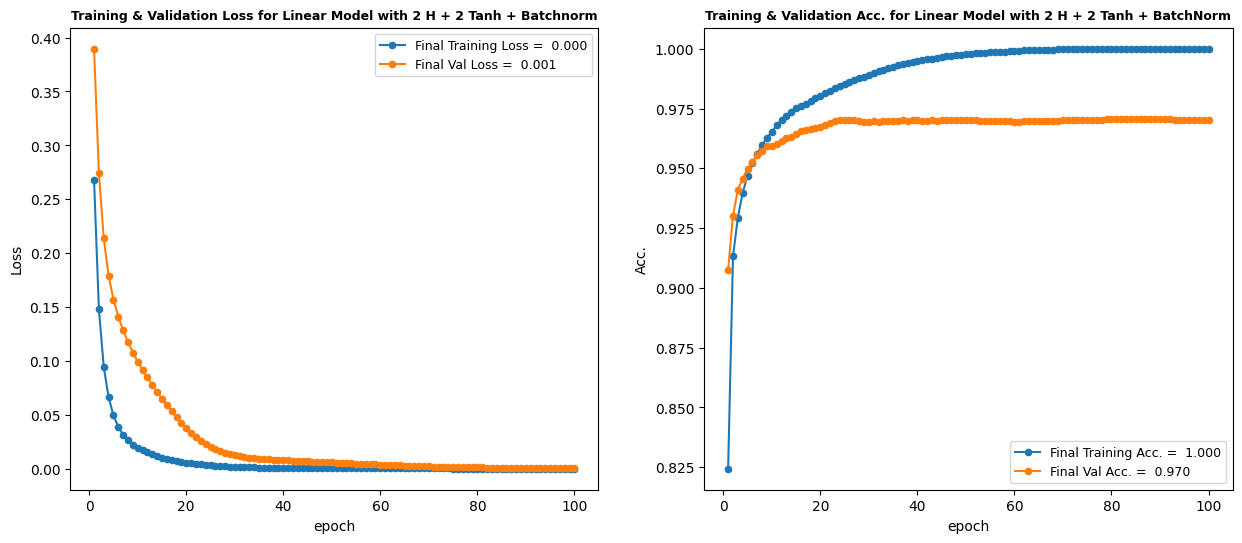

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=9)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=9)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for Linear Model with 2 H + 2 Tanh + Batchnorm', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=9)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=9)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for Linear Model with 2 H + 2 Tanh + BatchNorm', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr = 0.01
num_epochs = 100
model_selected = Linear_Net_2H_2Tanh_BatchNorm()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9689



- [x] <a name=''>${{\color{}{\bf{\text{Linear Model}}}}}$</a>

- [ ] <a name=''>${{\color{}{\bf{\text{CNN}}}}}$</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
num_outputs = 10
output_H1 = 16
output_H2 = 32
class Simple_CNN(nn.Module):

    def __init__(self, output_H1=output_H1, output_H2=output_H2):

        super(Simple_CNN, self).__init__()

        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=output_H1, kernel_size=5, padding=2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.AdaptiveMaxPool2d((28, 28))

        self.cnn2 = nn.Conv2d(in_channels=output_H1, out_channels=output_H2, kernel_size=5, padding=2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.AdaptiveAvgPool2d((28, 28))

        self.fc1 = nn.Linear(in_features=output_H2 * 28 * 28, out_features=num_outputs)

        # Initialization Part:
        nn.init.xavier_uniform_(self.cnn1.weight)
        nn.init.xavier_uniform_(self.cnn2.weight)

        nn.init.normal_(self.cnn1.bias)
        nn.init.normal_(self.cnn2.bias)

    def forward(self, x):

        x = x.float()

        x = self.cnn1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.cnn2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        
        return x



In [ ]:
lr = 0.01
num_epochs = 20
model_selected = Simple_CNN()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

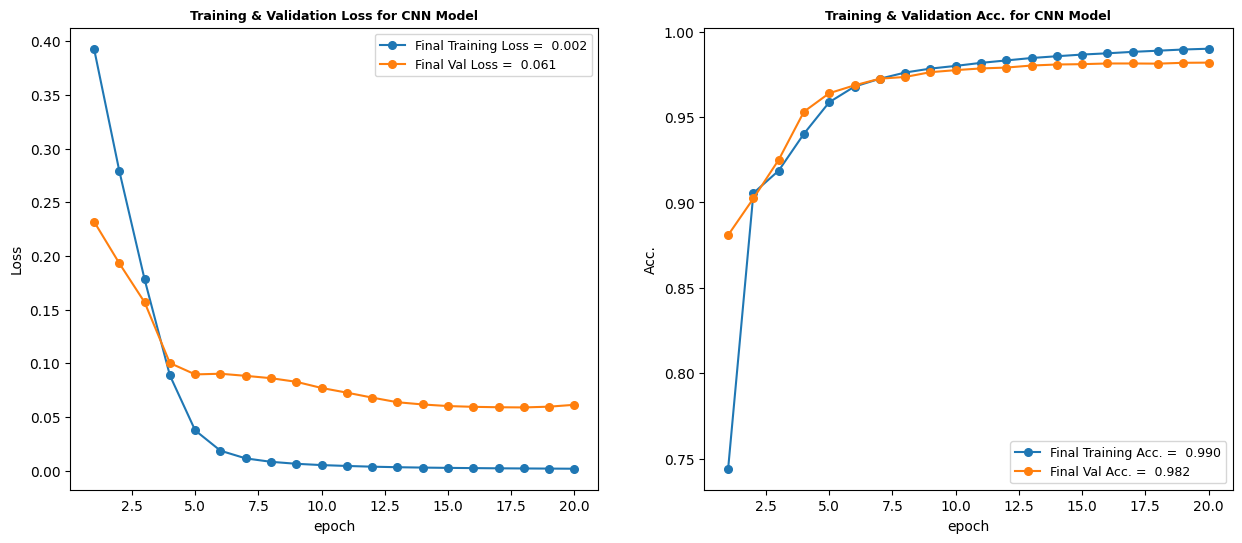

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for CNN Model', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for CNN Model', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9828



- <a name=''>${\small{\color{gold}{\bf{\text{CNN + BatchNorm}}}}}$</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
num_outputs = 10
output_H1 = 16
output_H2 = 32
class Simple_CNN_BatchNorm(nn.Module):

    def __init__(self, output_H1=output_H1, output_H2=output_H2):

        super(Simple_CNN_BatchNorm, self).__init__()

        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=output_H1, kernel_size=5, padding=2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.AdaptiveMaxPool2d((28, 28))
        self.bn1 = nn.BatchNorm2d(num_features=output_H1)

        self.cnn2 = nn.Conv2d(in_channels=output_H1, out_channels=output_H2, kernel_size=5, padding=2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.AdaptiveAvgPool2d((28, 28))
        self.bn2 = nn.BatchNorm2d(num_features=output_H2)


        self.fc1 = nn.Linear(in_features=output_H2 * 28 * 28, out_features=num_outputs)

        # Initialization Part:
        nn.init.xavier_uniform_(self.cnn1.weight)
        nn.init.xavier_uniform_(self.cnn2.weight)

        nn.init.normal_(self.cnn1.bias)
        nn.init.normal_(self.cnn2.bias)


    def forward(self, x):

        x = x.float()

        x = self.cnn1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.bn1(x)

        x = self.cnn2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.bn2(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)

        return x



In [ ]:
lr = 0.01
num_epochs = 20
model_selected = Simple_CNN_BatchNorm()
optimizer = torch.optim.SGD(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

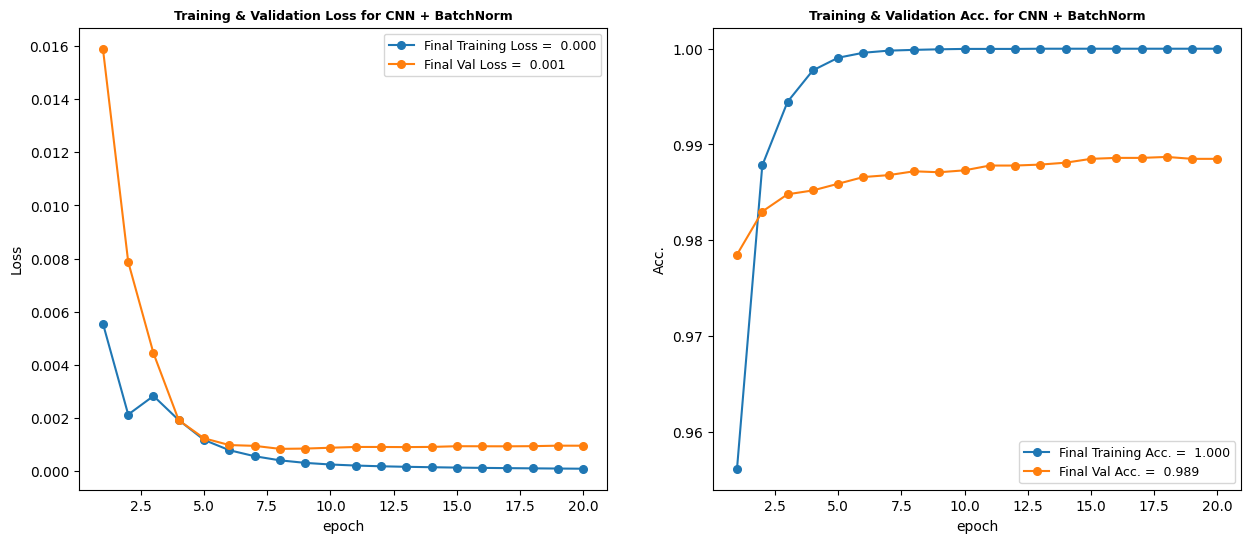

In [ ]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for CNN + BatchNorm', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for CNN + BatchNorm', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [ ]:
lr_best = 0.01
model = trained_linear_model
optimizer = torch.optim.SGD(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.9882



- [x] <a name=''>${{\color{}{\bf{\text{CNN}}}}}$</a>

- [ ] <a name='30'>[${\underline{\color{}{\bf{\text{CIFAR10}}}}}$](#20)</a>

In [ ]:
T = transforms.ToTensor()

In [ ]:
path_root_str = '/content/drive/MyDrive/Colab/Ex_1'

dataset_CIFAR10 = datasets.CIFAR10(root=path_root_str, train=True, download=True, transform=T)
dataset_CIFAR10_test = datasets.CIFAR10(root=path_root_str, train=False, download=True, transform=T)

print(f'\nCIFAR10 Dataset Train: \n\n{dataset_CIFAR10}\n')
print(f'\nCIFAR10 Dataset Test: \n\n{dataset_CIFAR10_test}\n')

Files already downloaded and verified
Files already downloaded and verified

CIFAR10 Dataset Train: 

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/Colab/Ex_1
    Split: Train
    StandardTransform
Transform: ToTensor()


CIFAR10 Dataset Test: 

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab/Ex_1
    Split: Test
    StandardTransform
Transform: ToTensor()



- - <a name=''>${\small{\color{}{\bf{\text{Data Exploring}}}}}$</a>



In [ ]:
print(f'\nType of data_CIFAR10 Data: {type(dataset_CIFAR10.data)}\n')
print(f'\nShape of data_CIFAR10 Data: {dataset_CIFAR10.data.shape}\n')
print(f'\nData Type of data_CIFAR10 Data: {dataset_CIFAR10.data.dtype}\n\n\n')

print(f'\n\n\nType of data_CIFAR10_targets: {type(dataset_CIFAR10.targets)}\n')
print(f'\n\nShape of data_CIFAR10_targets: {np.unique(dataset_CIFAR10.targets)}\n')


Type of data_CIFAR10 Data: <class 'numpy.ndarray'>


Shape of data_CIFAR10 Data: (50000, 32, 32, 3)


Data Type of data_CIFAR10 Data: uint8






Type of data_CIFAR10_targets: <class 'list'>



Shape of data_CIFAR10_targets: [0 1 2 3 4 5 6 7 8 9]



- - <a name=''>[${\bf{\underline{\small{\color{}{{\text{Data Splitting}}}}}}}$](https://pytorch.org/docs/stable/data.html)</a>

In [ ]:
torch.manual_seed(0)
dataset_CIFAR10_train, dataset_CIFAR10_val = random_split(dataset_CIFAR10, [40000, 10000])

print(f'\nNo. Samples for dataset_CIFAR10_train: {len(dataset_CIFAR10_train)}\n')
print(f'\nNo. Samples for dataset_CIFAR10_val: {len(dataset_CIFAR10_val)}\n')
print(f'\nNo. Samples for dataset_CIFAR10_test: {len(dataset_CIFAR10_test)}\n')


No. Samples for dataset_CIFAR10_train: 40000


No. Samples for dataset_CIFAR10_val: 10000


No. Samples for dataset_CIFAR10_test: 10000



- - <a name=''>[${\bf{\underline{\small{\color{}{{\text{Data Loader}}}}}}}$](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)</a>

In [ ]:
torch.manual_seed(0)
batch_size = 128
train_loader = DataLoader(dataset_CIFAR10_train, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset_CIFAR10_val, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset_CIFAR10_test, batch_size=batch_size, shuffle=False)

- - <a name=''>${\small{\color{}{\bf{\text{Data Showing: First Batch of the Train Loader}}}}}$</a>


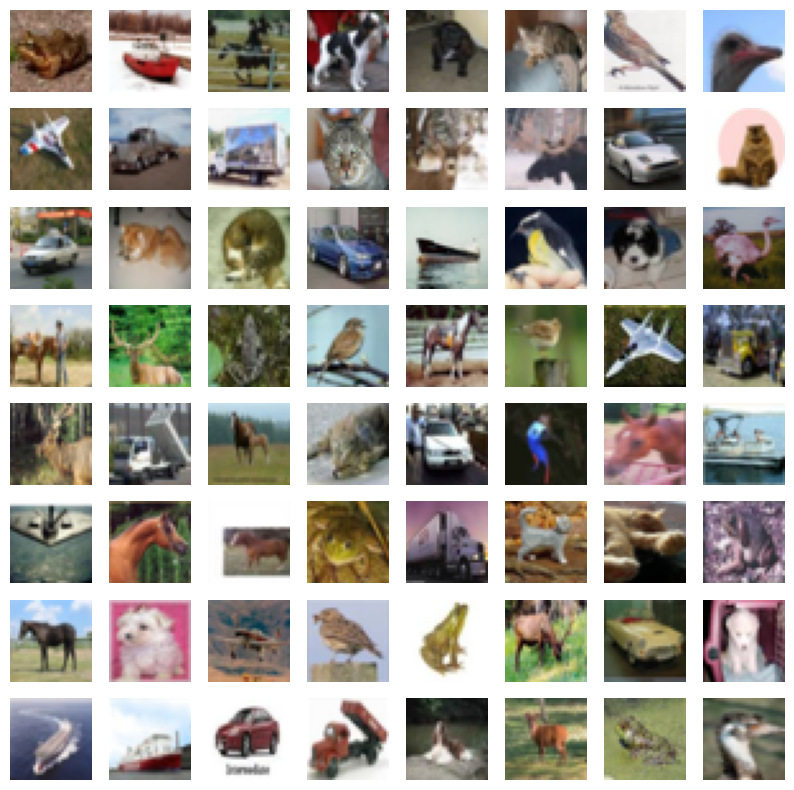

In [ ]:
num_batches = 0
for x, y in train_loader:
    
    
    for i in range(batch_size):
        img = x[i].squeeze(0)
        img = np.transpose(img, (1, 2, 0))
        plt.figure(1, figsize=(10, 10))
        plt.subplot(8, 8, i + 1), plt.imshow(img), plt.axis('off')

    num_batches += 1
    if num_batches == 1: 
        break

plt.show()

- - <a name=''>[${\bf{\underline{\small{\color{}{{\text{@ Kaggle}}}}}}}$](https://www.kaggle.com/code/shadabhussain/cifar-10-cnn-using-pytorch)</a>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [98]:

class CIFAR10_Net(nn.Module):

    def __init__(self):

        super(CIFAR10_Net, self).__init__()

        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32), 
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16
            nn.BatchNorm2d(64), 


            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128), 
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
            nn.BatchNorm2d(128), 


            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256), 
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            nn.BatchNorm2d(256), 

            nn.Flatten(), 
            nn.Linear(256 * 4 * 4, 1024),
            nn.ReLU(),
            # nn.Dropout(0.2), 
            nn.BatchNorm1d(1024), 


            nn.Linear(1024, 512),
            nn.Sigmoid(),
            # nn.Dropout(0.2), 
            nn.BatchNorm1d(512), 


            nn.Linear(512, 10))
    
        

    def forward(self, x):
        return self.network(x)


In [ ]:
from torchsummary import summary

In [99]:
model = CIFAR10_Net()
model.to(device='cuda')
summary(model, input_size=(3, 32, 32), batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [128, 32, 32, 32]             896
              ReLU-2          [128, 32, 32, 32]               0
       BatchNorm2d-3          [128, 32, 32, 32]              64
            Conv2d-4          [128, 64, 32, 32]          18,496
              ReLU-5          [128, 64, 32, 32]               0
         MaxPool2d-6          [128, 64, 16, 16]               0
       BatchNorm2d-7          [128, 64, 16, 16]             128
            Conv2d-8         [128, 128, 16, 16]          73,856
              ReLU-9         [128, 128, 16, 16]               0
      BatchNorm2d-10         [128, 128, 16, 16]             256
           Conv2d-11         [128, 128, 16, 16]         147,584
             ReLU-12         [128, 128, 16, 16]               0
        MaxPool2d-13           [128, 128, 8, 8]               0
      BatchNorm2d-14           [128, 12

In [103]:
lr = 0.001
num_epochs = 20
model_selected = CIFAR10_Net()
optimizer = torch.optim.Adam(model_selected.parameters(), lr=lr)

loss_train, loss_val, acc_train, acc_val, trained_linear_model= train_model(model=model_selected, num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader)

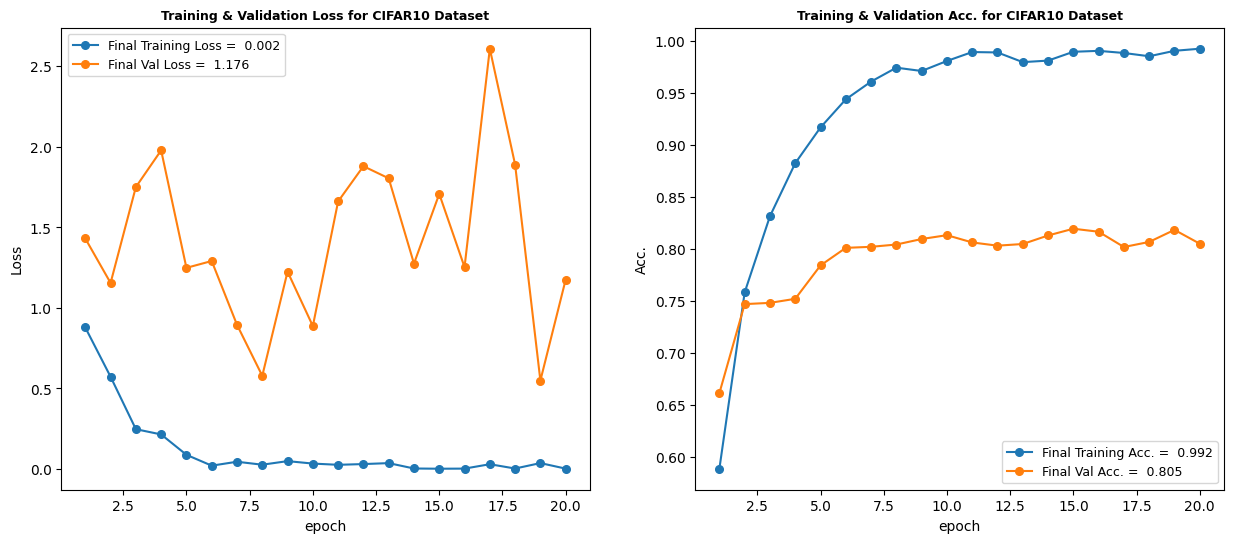

In [104]:
epoch = np.arange(1, num_epochs + 1)
plt.figure(1, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, loss_train, label=f'Final Training Loss = {loss_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, loss_val, label=f'Final Val Loss = {loss_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title(f'Training & Validation Loss for CIFAR10 Dataset', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.subplot(1, 2, 2)
plt.plot(epoch, acc_train, label=f'Final Training Acc. = {acc_train[-1]: 0.3f}', marker='.', markersize=11)
plt.plot(epoch, acc_val, label=f'Final Val Acc. = {acc_val[-1]: 0.3f}', marker='.', markersize=11)

plt.ylabel('Acc.')
plt.xlabel('epoch')
plt.title('Training & Validation Acc. for CIFAR10 Dataset', fontweight='bold', color='black', fontsize=9)
plt.legend(fontsize=9)

plt.show()

In [105]:
lr_best = 0.001
model = trained_linear_model
optimizer = torch.optim.Adam(model.parameters(), lr=lr_best)

acc_test = test_model(model=model, optimizer=optimizer, test_loader=test_loader)
print(f'\nTest Result:\n\nAcc. = {acc_test}\n')


Test Result:

Acc. = 0.8164



- [x] <a name=''>${{\color{}{\bf{\text{CIFAR10}}}}}$</a>